<a href="https://colab.research.google.com/github/Ivanchis01/Proyecto_matematicas_del_aprendizaje_de_maquinas/blob/main/SEAlforLinkPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SEAL ML**
Este notebook contiene la implementación para predicción de enlaces del algoritmo SEAL, explicado y con ciertas modificaciones para su correcto funcionamiento en Google Colab.

Más información de SEAL puede ser encontrada en el siguiente enlace: https://muhanzhang.github.io/SEAL_website/SEAL.html
El link al github original puede verse aquí: https://github.com/facebookresearch/SEAL_OGB

# **Para su correcto funcionamiento es necesario instalar primero las siguientes librerías**

In [ ]:
pip install ogb #OGB es una colección realista, vasta y diversa de datasets para machine learning de grafos

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 #Instala PyTorch, una librería para la ejecución y modelamiento sencillo de algoritmos basados en machine learning

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!python -c "import torch; print(torch.__version__)"

2.3.1+cu121


In [ ]:
pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 14.5 MB/s eta 0:00:00


In [ ]:
pip install torch-sparse -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.5 MB/s eta 0:00:00


In [ ]:
pip install torch-geometric #torch-geometric es una librería construida sobre PyTorch para escribir y entrenar fácilmente redes neuronales gráficas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00


# **Importamos ahora todas las librerías necesarias para desarrollar el proyecto**



In [ ]:
import os #Este módulo provee una manera versátil de usar funcionalidades dependientes del sistema operativo.
import os.path as osp #Módulo que ofrece funciones útiles para las rutas
import sys #Este módulo provee acceso a algunas variables usadas o mantenidas por el intérprete y a funciones que interactúan fuertemente con el intérprete.
import copy as cp #Módulo que contiene un onjunto de funciones relacionadas con la copia de diferentes elementos de una lista, objetos, matrices, etc.
import time #Este módulo proporciona varias funciones relacionadas con el tiempo.
import math #Este módulo proporciona operaciones matemáticas
import numpy as np #Este módulo facilita lass operaciones con matrices
import random #Este módulo genera elementos de carácter pseudoaleatorio
import pdb #El módulo pdbdefine un depurador de código fuente interactivo para programas Python.
from tqdm import tqdm #Hace que los bucles muestren instantáneamente un medidor de progreso inteligente
import warnings #Permite emitir mensajes de advertencia
warnings.filterwarnings("ignore", category=UserWarning)

#==============================TORCH==================================================

import torch #Importa la librería torch
from torch.nn import (ModuleList, Linear, Conv1d, MaxPool1d, Embedding, ReLU,
                      Sequential, BatchNorm1d as BN)
import torch.nn.functional as F
from torch.nn import BCEWithLogitsLoss #Importa una función de perdida que combina una capa sigmoide y la funcion de pérdida BCL
from torch.utils.data import DataLoader #Representa un iterable de python sobre un dataset

#=========================TORCH.GEOMETRIC=============================================

from torch_geometric.nn import (GCNConv, SAGEConv, GINConv,
                                global_sort_pool, global_add_pool, global_mean_pool) #Importa operadores para redes neuronales de grafos propuestas en distintos papers
import torch_geometric.transforms as T #Las transformaciones son una forma general de modificar y personalizar objetos, ya sea pasándolos implícitamente como argumento a Dataset o aplicándolos explícitamente a objetos Data u individuales HeteroData
from torch_geometric.datasets import Planetoid #Planetoid es un conjunto de datos que incluye tres conjuntos de datos (cora,citeseer,pubmed) que consistene en grafos de citas científicas, los nodos representan documentos y las aristas citas entre ellos
                                                #la clase planetoid proporciona una forma sencilla de cargar y manejar estos conjuntos de datos
from torch_geometric.datasets import Actor
from torch_geometric.data import Data, Dataset, InMemoryDataset, DataLoader #Objeto de datos que describe un grafo homogéneo, clase base para la creación de grafos de dataset,
                                                                             #Clase base de conjunto de datos para crear conjuntos de datos de gráficos que caben fácilmente en la memoria de la CPU
                                                                              #Cargador de datos que fusiona objetos de datos de una clase torch_geometric.data.dataset en un mini lote (subconjunto del conjunto de datos total).
from torch_geometric.utils import (negative_sampling, add_self_loops, #Muestrea aristas random negativas de un grafo dado, añade un auto-loop a cada nodo del grafo
                                   train_test_split_edges)            #Divide las aristas de un torch_geometric.data.Data en aristas positivas y negativas para train/val/test
from torch_geometric.utils import to_networkx, to_undirected#Convierte una instancia torch_geometric.data.Data a un networkx.Graph, to_undirected convierte el grafo dado en un grafo no dirigido
from torch_sparse import coalesce #se utiliza para asegurarse de que un tensor de índices de un grafo (o un tensor disperso) esté en una forma estándar y optimizada.

#===============================SCIPY==================================================
import scipy.sparse as ssp #Paquete de matrices dispersas para datos numéricos
from scipy.sparse.csgraph import shortest_path #Realiza una búsqueda de ruta más corta en un grafo positivo dirigido o no dirigido
from scipy.sparse import SparseEfficiencyWarning #Se utiliza para alertar a los usuarios sobre posibles ineficiencias en las operaciones con matrices dispersas.
warnings.simplefilter('ignore', SparseEfficiencyWarning)
#===============================OTROS==================================================
from shutil import copy #Copia un archivo en otro y retorna la ruta al nuevo archivo
from sklearn.metrics import roc_auc_score #Calcula el area bajo la curva ROC(receiver operating characteristics) para un conjunto de predicciones; sirve para evaluar la capacidad de un modelo de clasificación binaria
import networkx as nx
import matplotlib.pyplot as plt
from ogb.linkproppred import PygLinkPropPredDataset, Evaluator #Importa datasets para probar el predecir las propiedades de las aristas(link prediction), Sirve para medir el rendimiento de los modelos en tareas de predicción de enlaces

# **Veamos ahora un ejemplo de cada una de las librerías que hemos importado antes de proceder con el código** (NO ES NECESARIO EJECUTARLO)

## *OS, Sys, copy, time, math, numpy, random, pdb, tqdm*

In [ ]:
ruta_de_trabajo_actual= os.getcwd()
print('(OS)Ruta de trabajo actual = ',ruta_de_trabajo_actual)
argumentos_de_la_linea_de_comandos = sys.argv
print('(SYS)Argumentos de la lista de comandos pasados al script de python = ',argumentos_de_la_linea_de_comandos)
matrix=[1,2,3,4]
copy_matrix=cp.copy(matrix)
print('(COPY)Copia de la matriz = ',copy_matrix)
hora=time.ctime(0)
print('(TIME)Tiempo = ',hora)
operacion_matematica = math.cos(math.pi /2)
print('(MATH)Coseno de pi/2 = ',math.floor(operacion_matematica))
array=[[2,2],[3,3]]
numpy_array=np.array(array)
print('(NUMPY)Numpy array = \n',numpy_array)
random_number=random.randint(200000000,300000000400)
print('(RANDOM)Numero pseudoaleatorio = ',random_number)
#pdb.set_trace() #Python se detiene y espera a que usted le diga qué hacer a continuación. Verás un (Pdb)mensaje. Esto significa que ahora está en pausa en el depurador interactivo y puede ingresar un comando.
print('(TQDM)')
for i in tqdm(range(10000000)):
  a=5

(OS)Ruta de trabajo actual =  /content
(SYS)Argumentos de la lista de comandos pasados al script de python =  ['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-d9ddee6a-c1ff-49a8-99a5-812e8fbaeea8.json']
(COPY)Copia de la matriz =  [1, 2, 3, 4]
(TIME)Tiempo =  Thu Jan  1 00:00:00 1970
(MATH)Coseno de pi/2 =  0
(NUMPY)Numpy array = 
 [[2 2]
 [3 3]]
(RANDOM)Numero pseudoaleatorio =  188157630408
(TQDM)


100%|██████████| 10000000/10000000 [00:05<00:00, 1714991.31it/s]


## *TORCH*

In [ ]:
#from torch.nn import (ModuleList,Linear)
##ModuleList se utiliza para contener una lista ordenada de módulos que componen un modelo de red neuronal.
##Cada elemento en la lista es un módulo de PyTorch que puede ser una capa, una función de activación,
##una operación personalizada, etc. Un modulo es la clase base de la que derivan todas las capas y modelos
##en la biblioteca torch.nn. son los objetos que encapsulan los parámetros entrenables, las operaciones
##y la lógica necesaria para realizar cálculos dentro de una red neuronal.
#Linear recibe como input el tamaño de las muestras de input y las muestras de salida y crea una transformación que se ajuste a los tamaños indicados
linears = ModuleList([Linear(3, 5) for i in range(10)]) ##Set de 10 transformadas LINEALES de input size 3 a output_size 5
tensorRndom=torch.randn(4,3) ##tensor random de tamaño 4x3
transLineal=linears[1](tensorRndom) ##Aplicamos la transformada lineal en el indice 1 del modulelist al tensorRandom
print(transLineal)##Queda de tamaño (tensorRndom,Linear)

tensor([[-0.2714, -0.2912, -0.3590,  0.6622,  0.2786],
        [-0.0380,  0.4212, -0.7337, -0.4344, -0.1393],
        [-0.3909, -0.6070, -0.5138,  0.9382,  0.5270],
        [-0.2135,  0.4659,  0.1472,  0.9334, -0.2213]],
       grad_fn=<AddmmBackward0>)


In [ ]:
##Conv1d aplica una convolución 1D sobre una señal de entrada, toma como parámetros el numero de canales en la imagen de entrada, el numero de canales que producirá la convolución y el tamaño del kernel de convolución
##El numero de canales en la entrada corresponde al m del size nxmxl del vector de entrada
##El numero de canales en la salida corresponde al out del size in,out,k del conv1d
##El tamaño del Kernel no puede ser más grande que el l del input_size
m = Conv1d(1, 2, 2)
input = torch.randn(3, 1, 10) #Generamos un tensor aleatorio de tamaño 3x2x4 [[....],[....]],[[....],[....]],[[....],[....]]
output = m(input) ##Siempre tendrá el n del nxmxl del tensor de entrada
print(output)

tensor([[[-0.3701,  0.2033,  0.0749,  0.6945,  0.3408, -0.2208, -0.1888,
          -0.4437, -0.8898],
         [-0.8997, -0.4243, -1.2301, -1.4120, -0.5841, -0.2921, -0.5119,
           0.4848,  0.1416]],

        [[ 0.0249, -0.6175, -1.0631, -0.2845,  0.3762,  0.1271,  0.1275,
          -0.1636, -0.1190],
         [-0.4074,  0.6277,  0.4570, -0.9860, -0.7779, -0.8869, -0.5556,
          -0.3553, -0.6219]],

        [[ 0.2446, -0.3100, -0.2781, -0.6828, -1.3511, -0.5244, -0.0429,
          -0.3679, -0.6609],
         [-0.4774, -0.1803, -0.4126,  0.9893,  0.6395, -0.4951, -0.3654,
          -0.0406,  0.3745]]], grad_fn=<ConvolutionBackward0>)


In [ ]:
##Maxpool1d calcula el máximo valor para parches de un mapa de caracteristicas y reduce la dimensión de la señal de entrada
m = MaxPool1d(6) #Recibe como parámetro el tamaño del kernel, y el tamaño del paso, que por defecto es igual al kernel
input = torch.randn(2, 3, 8)
print(input)
output = m(input) ##El otput tiene el mismo nxm que el nxmxl del tensor de entrada pero la l se ve reducida (probablemente sea l+1-kernel si el tamaño del paso es 1)
print(output)

tensor([[[-1.3216, -1.3050,  1.0142, -0.0575,  1.7287, -0.9887, -0.8285,
           0.1806],
         [-0.4318,  0.0492, -0.5692,  0.6922,  0.0933,  0.4473, -0.5662,
           0.1734],
         [ 0.8640, -0.3916,  0.0475,  0.8182, -0.7013,  0.2792,  1.0739,
           0.9268]],

        [[ 0.6347, -0.0437,  1.4699,  0.1867, -0.1432,  0.3252, -0.3472,
           2.0984],
         [-0.0979,  1.0013, -2.9121, -0.6872,  0.6046,  0.6919, -0.1856,
          -1.7545],
         [ 1.9661,  0.3951,  1.9198, -0.3303, -0.8137,  0.2590,  1.1249,
          -1.4186]]])
tensor([[[1.7287],
         [0.6922],
         [0.8640]],

        [[1.4699],
         [1.0013],
         [1.9661]]])


In [ ]:
embedding = Embedding(10, 3) ##Crea una matriz de embedding con un vocabulario de tamaño 10 y una dimension de embedding 3
input = torch.LongTensor([[9, 8, 7, 0,1], [6, 5, 4, 3,2]]) #Tensor de indices enteros
embedding(input) ##Tensor tridimensional de forma (2,4,3) 2 pues es el tamaño del lote correspondiente al numero de secuencias de entrada, 4 porque es la long maxima de las secuencias de entrada y 3 porque es la dim especificada
#Embedding es una matriz de muchos tensores, lo que hace es buscar en su tabla interna y devuelve los vectores de embedding correspondientes a los índices dados en el tensor es decir, para 2, ubica el tensor de dimension 3 con indice 2
##Si indico un indice por fuera del vocabulario se peta (0,n)

tensor([[[-0.4394,  0.7336,  0.3011],
         [ 1.8582, -0.3632, -1.8076],
         [-0.2005,  1.0626,  0.2678],
         [-0.3113,  0.4633,  0.0996],
         [ 0.4993, -0.4642, -0.4727]],

        [[-0.7551,  0.5337, -0.0430],
         [ 0.8066,  1.0297,  2.3186],
         [ 1.0395, -1.1044,  1.4557],
         [-0.2880,  0.6555, -0.7479],
         [-0.1289, -2.0322, -0.1937]]], grad_fn=<EmbeddingBackward0>)

In [ ]:
##Aplica ReLu :D al tensor de entrada
m = ReLU()
input = torch.randn(2,3,4)
output = m(input)
print(output)

tensor([[[1.5493, 0.2695, 0.0000, 2.0211],
         [0.0000, 0.0000, 0.5249, 0.0000],
         [0.4636, 0.0000, 0.0000, 1.5871]],

        [[0.6233, 0.3285, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.2174],
         [1.0785, 0.0000, 0.7890, 0.0000]]])


In [ ]:
##Es un contenedor secuencial, los modulos son aplicados en orden a la entrada
model = Sequential(
          Conv1d(2,1,3),
          ReLU(),
        ) ##Necesita una lista de modulos como parámetros

input = torch.randn(3,2,4)
output = model(input) ##Aplica primero conv1d al tensor de entrada y luego le pasa ReLU
print(output)

tensor([[[0.0000, 0.0000]],

        [[0.0000, 0.3855]],

        [[0.7444, 0.0000]]], grad_fn=<ReluBackward0>)


In [ ]:
##Aplica una normalización Batch sobre un input 2d o 3d
m = BN(3) ##Recibe como parametro el numero de caracteristicas o canales del input
input = torch.randn(3, 3) ##Tensor random 2d

output = m(input)
print(output)

tensor([[ 1.1275,  1.1483,  1.2858],
        [-1.3030, -1.2890, -1.1527],
        [ 0.1755,  0.1408, -0.1331]], grad_fn=<NativeBatchNormBackward0>)


In [ ]:
##Para acceder más facilmente a las funciones de convolución, de pooling, de activación, de pérdida, etc...
##Son distintas a las usadas antes, tienen diferentes parámetros
##Ejemplo
input = torch.randn(3,2,4)
filtros= torch.randn(3,2,4)
function=F.conv1d(input,filtros) ##Recibe como entrada el input, y los filtros de forma
print(function)

tensor([[[-1.1032],
         [ 3.9813],
         [-5.4659]],

        [[-0.6133],
         [-0.6724],
         [ 2.7817]],

        [[-3.5926],
         [-0.3046],
         [-2.0182]]])


In [ ]:
#BCEWithLogitsLoss
target = torch.ones([2, 3], dtype=torch.float32)  # 64 classes, batch size = 10
print(target)
output = torch.full([2, 3], 1.5)  # A prediction (logit)
print(output)
pos_weight = torch.full([3],2.3)  # All weights are equal to 2.3
print(pos_weight)
loss = BCEWithLogitsLoss(pos_weight=pos_weight)
aplicado=loss(output, target)  # -log(sigmoid(1.5))
print(aplicado.item()) #Escalar que indica el promedio de error de la predicción

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000]])
tensor([2.3000, 2.3000, 2.3000])
0.4632505476474762


In [ ]:
#DataLoader carga los datos de manera eficiente
class MyIterableDataset(torch.utils.data.IterableDataset): #Clase para datasets que pueden ser iterados
    def __init__(self, start, end): #Rango de numeros enteros que el dataset producirá
        super(MyIterableDataset).__init__()
        assert end > start, "this example code only works with end >= start"
        self.start = start
        self.end = end
    def __iter__(self):
        worker_info = torch.utils.data.get_worker_info() #devuelve diversa información útil del trabajador actual (incluida la identificación del trabajador, la réplica del conjunto de datos, la semilla inicial, etc.)
        if worker_info is None:  # single-process data loading, return the full iterator
            iter_start = self.start
            iter_end = self.end
        else:  # in a worker process
            # split workload
            per_worker = int(math.ceil((self.end - self.start) / float(worker_info.num_workers)))
            worker_id = worker_info.id
            iter_start = self.start + worker_id * per_worker
            iter_end = min(iter_start + per_worker, self.end)
        return iter(range(iter_start, iter_end))
ds = MyIterableDataset(start=1, end=13) #Creamos una instancia de la clase con datos en [1,13)
print(list(torch.utils.data.DataLoader(ds))) #Carga los datos utilizando un solo proceso
dual_workers=torch.utils.data.DataLoader(ds, num_workers=6)
print(list(dual_workers)) #carga los datos utilizando 2 subprocesos. Divide el rango [1, 13) entre los subprocesos (6)
print(list(torch.utils.data.DataLoader(ds, num_workers=12))) #carga los datos utilizando 12 subprocesos. Divide el rango [1, 13) entre los subprocesos (12)

[tensor([1]), tensor([2]), tensor([3]), tensor([4]), tensor([5]), tensor([6]), tensor([7]), tensor([8]), tensor([9]), tensor([10]), tensor([11]), tensor([12])]
[tensor([1]), tensor([3]), tensor([5]), tensor([7]), tensor([9]), tensor([11]), tensor([2]), tensor([4]), tensor([6]), tensor([8]), tensor([10]), tensor([12])]
[tensor([1]), tensor([2]), tensor([3]), tensor([4]), tensor([5]), tensor([6]), tensor([7]), tensor([8]), tensor([9]), tensor([10]), tensor([11]), tensor([12])]


## *TORCH-GEOMETRIC*

Processing...
Done!


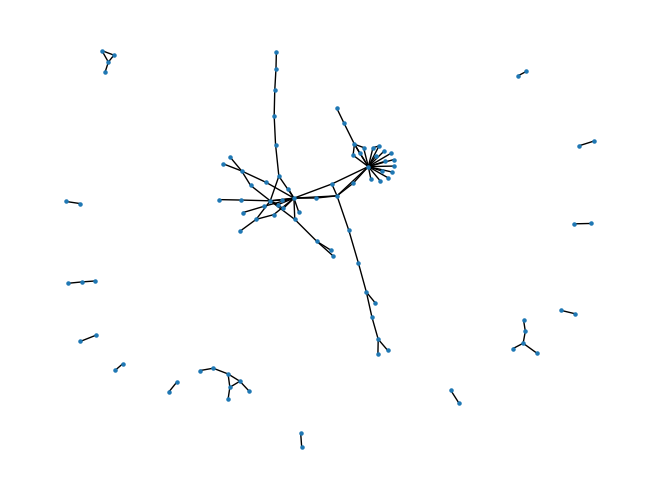

In [ ]:
import matplotlib as plt
import networkx as nx
from sklearn.manifold import TSNE
from torch_geometric.utils import subgraph


def visualize_graphExample(data):
    G = to_networkx(data, to_undirected=True)  # Convertir a NetworkX Graph
    nx.draw(G,node_size=5)
    plt.pyplot.show()

def get_reduced_data(data, num_nodes):
    # Asegurarse de que num_nodes no sea mayor que el número total de nodos en el grafo original
    assert num_nodes <= data.num_nodes, "num_nodes should be less than or equal to the number of nodes in the original graph"
    # Seleccionar aleatoriamente algunos nodos
    subset = torch.tensor(random.sample(data.edge_index[0].tolist(),num_nodes)) #Subset aleatorio
    edge_index1,edge_attr1=subgraph(subset, edge_index=data.edge_index,relabel_nodes=True) #edge_index del subset aleatorio
    #Creamos un nuevo subset sin nodos no conectados
    subset2=(edge_index1[0].tolist()+edge_index1[1].tolist())
    subset1 = []
    for i in subset2:
      if i not in subset1:
        subset1.append(i)
    edge_index1,edge_attr1=subgraph(torch.tensor(subset1), edge_index=edge_index1,relabel_nodes=True) #edge_index de los nodos aleatorios, sin los nodos dispersos
    reduced_data = Data(edge_index=edge_index1,num_nodes=len(subset1)) #Creamos la nueva data reducida
    return reduced_data

#Usaremos un dataset pequeño de ejemplo de Planetoid (como Cora), que es una colección de datos de grafos comúnmente utilizada en la investigación de GCN
# Descargamos el dataset de Cora
datasetExample1 = Planetoid(root='data/Planetoid', name='Cora', transform=T.NormalizeFeatures()) #Usamos tambien una transformada del paquete de transformers

# Obtenemos un solo grafo de ejemplo del dataset
data = datasetExample1[0]
num_nodes = 200 #Se puede cambiar para tener más o menos nodos
dataReduced = get_reduced_data(data, num_nodes)
visualize_graphExample(dataReduced) #Visualizamos el grafo antes de pasar por el modelo

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
3 4
[0, 1, 2]


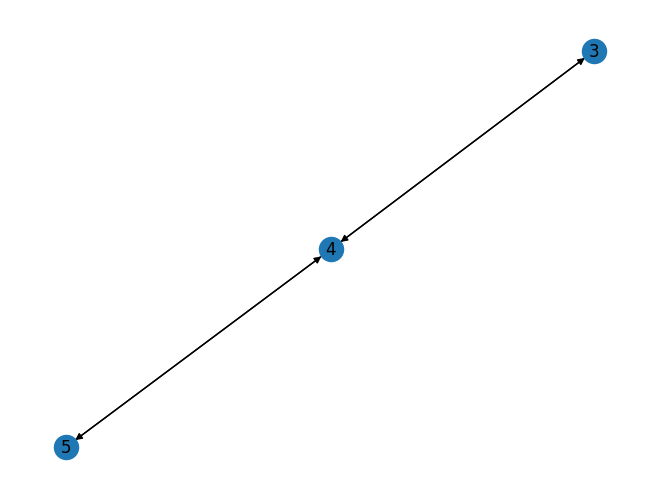

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


edge_index = torch.tensor([[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6],
                            [1, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5]])
subset = torch.tensor([3, 4, 5])
a,b=subgraph(subset, edge_index,relabel_nodes=True)
print(a)
reduced_data = Data(edge_index=a,num_nodes=3)
print(reduced_data.num_nodes,reduced_data.num_edges)
#print(reduced_data.node_stores)

G = nx.Graph()

G = to_networkx(reduced_data)
labels = {}
j=0
for i in range(len(subset)):
  labels[j] = subset[i].item()
  j+=1
print(G.nodes)
nx.draw(G,labels=labels)
plt.show()

# **Codigo principal**
Debe ser corrido todo en orden para su correcto funcionamiento

## **Definición de modelos**

Entendamos primero como funcionan los modelos en PyTorch:
Los modelos en pytorch se definen como clases hijas de la clase Módulo de pytorch, esto le permite heredar todos los métodos y atributos que se deinen en la documentación de la librería.
Forward define la lógica del paso hacia adelante del modelo, es decir, como se procesan los datos de entrada para obtener la salida.
En pytorch la función forward no se llama directamente. En su lugar, se llama la instancia del modelo como si fuera una función, lo que internamente llama a forward. Este mecanismo es posible porque la clase Module de PyTorch tiene un método __call__ sobrecargado que hace algunas tareas adicionales como manejar hooks, y luego llama a forward.

**Detalles del paso Forward**:
1. Entrada: Se suministran datos de entrada al modelo.

2. Procesamiento: Cada capa del modelo aplica una transformación a los datos.
Transformaciones comunes incluyen multiplicación matricial, funciones de activación (ReLU, Sigmoid), convoluciones, etc.
3. Salida:El resultado final de las transformaciones es la predicción del modelo.

**Detalles del Backward Pass:**

1. Cálculo de la pérdida:Se calcula la pérdida (error) entre las predicciones del modelo y los valores verdaderos.

2. Cálculo de gradientes: Se calculan los gradientes de la función de pérdida con respecto a cada parámetro del modelo usando el algoritmo de retropropagación.
PyTorch realiza esto automáticamente si se llama a loss.backward(), se le puede especificar la función de pérdida deseada, lo veremos más adelante.

3. Actualización de parámetros: Los gradientes calculados se usan para actualizar los parámetros del modelo.
Esto es manejado por el optimizador (por ejemplo, SGD, Adam).

**Resumen del Proceso Completo**
1. Forward Pass:Los datos de entrada pasan a través de la red y se producen las predicciones.
La lógica está definida en el método forward.

2. Cálculo de Pérdida:Se compara la predicción con el valor verdadero para calcular la pérdida.

3. Backward Pass:Se calculan los gradientes de la pérdida con respecto a los parámetros del modelo.
PyTorch realiza esto mediante loss.backward().
4. Actualización de Parámetros:Los parámetros del modelo se actualizan usando los gradientes calculados.
Esto es manejado por el optimizador con optimizer.step().

Este ciclo de forward y backward se repite para cada batch de datos durante el entrenamiento del modelo, permitiendo que el modelo aprenda a partir de los datos y mejore sus predicciones.

El paso forward va descrito como un método dentro de la misma clase del modelo, mientras que el paso backward se ve en el código principal.

In [ ]:
#Clases hijas de la clase Modulo, clase base para todos los modelos, heredan todas sus atributos y métodos
class GCN(torch.nn.Module): #Implementación de un modelo de Red Neuronal Gráfica (Graph Neural Network, GNN) utilizando convoluciones de grafos (Graph Convolutions)
    def __init__(self, hidden_channels, num_layers, max_z, train_dataset, use_feature=False, node_embedding=None, dropout=0.5):  #Constructor e inicialización de la clase
        #hidden_channels: Número de canales ocultos para las capas GCN.
        #num_layers: Número de capas GCN en la red.
        #max_z: Tamaño máximo del embeding para z.
        #train_dataset: Dataset de entrenamiento para extraer características y nodos.
        #use_feature: Indica si se deben utilizar características adicionales de los nodos.
        #node_embedding: Embedding opcional para nodos.
        #dropout: Tasa de dropout (tecnica para reducir el sobreajuste) para regularización.
        super(GCN, self).__init__()
        self.use_feature = use_feature
        self.node_embedding = node_embedding
        self.max_z = max_z
        self.z_embedding = Embedding(self.max_z, hidden_channels) #Embedding para las etiquetas de los nodos.

        #Creación de las capas GCN
        self.convs = ModuleList() #Modulelist con los modulos (capas) de convoluciones de grafos
        initial_channels = hidden_channels #Determina el numero de canales para la primera capa
        if self.use_feature: #Si se utilizan características de nodos (use_feature), se añaden al número de canales de entrada.
            initial_channels += train_dataset.num_features
        if self.node_embedding is not None: #Si se usa node_embedding, también se añaden estos canales.
            initial_channels += node_embedding.embedding_dim
        self.convs.append(GCNConv(initial_channels, hidden_channels))
        for _ in range(num_layers - 1):
            self.convs.append(GCNConv(hidden_channels, hidden_channels)) #GCNConv crea un numero previamente especificado de capas de convolución de grafos (Graph Convolutional Network, GCN) con hidden_channels nodos de entrada y hidden_channels nodos de salida
                                                                          #GCNConv toma las caracteristicas de entrada de los nodos y las actualiza teniendo en cuenta las caracteristicas de los vecinos y conexiones

        self.dropout = dropout
        self.lin1 = Linear(hidden_channels, hidden_channels) #Mapea de hidden_channels a hidden_channels a travez de transformaciones lineales.
        self.lin2 = Linear(hidden_channels, 1) #Mapea de hidden_channels a 1 (clasificación binaria) a travez de transformaciones lineales.

    def reset_parameters(self): #Este método reinicia los parámetros de las capas convolucionales, es útil para reentrenar el modelo desde cero.
        for conv in self.convs:
            conv.reset_parameters()

    def forward(self, z, edge_index, batch, x=None, edge_weight=None, node_id=None): #Determina como deben fluir los datos a través del modelo durante el forward pass
        z_emb = self.z_embedding(z) #z es una entrada de características, y self.z_embedding es una capa de embedding que convierte estas características en vectores densos de tamaño #hidden_channels.
        if z_emb.ndim == 3:  # Si z_emb tiene 3 dimensiones, significa que z tiene múltiples etiquetas enteras por lo tanto se suman a lo largo de la dimensión de las etiquetas enteras.
            z_emb = z_emb.sum(dim=1)
        if self.use_feature and x is not None: #Si self.use_feature es True y x no es None se concatenan las características originales x con las características embeddeadas z_emb. De lo contrario, usar solo z_emb.
            x = torch.cat([z_emb, x.to(torch.float)], 1) #Concatena la secuencia dada de tensores en la dimensión dada. Todos los tensores deben tener la misma forma
        else:
            x = z_emb
        if self.node_embedding is not None and node_id is not None: #Si hay una capa de embedding de nodo (self.node_embedding) y node_id no es None, concatenar el embedding de nodo a x
            n_emb = self.node_embedding(node_id)
            x = torch.cat([x, n_emb], 1)
        for conv in self.convs[:-1]: #Aquí se aplican todas las capas de convolución de grafo excepto la última. Después de cada convolución, aplicar una función de activación ReLU y luego una capa de dropout.
            x = conv(x, edge_index, edge_weight)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index, edge_weight) #Aplica la última capa de convolución de grafo.
        if True:  # center pooling #Las capas de pooling reducen la dimension espacial de los datos
            _, center_indices = np.unique(batch.cpu().numpy(), return_index=True) #Encuentra los índices de los nodos centrales en cada subgrafo.
            x_src = x[center_indices]
            x_dst = x[center_indices + 1]
            x = (x_src * x_dst) #multiplica las características de los nodos fuente y destino
            x = F.relu(self.lin1(x)) #Pasa por una capa lineal definida al inicio y luego por una capa de activación relu
            x = F.dropout(x, p=self.dropout, training=self.training) #Pasa por un dropout que es una técnica de regularización para reducir el sobreajuste, omite neuronas aleatoriamente
            x = self.lin2(x) # Finalmente pasa por la otra capa lineal definida al inicio.
        else:  # sum pooling
            x = global_add_pool(x, batch)
            x = F.relu(self.lin1(x))
            x = F.dropout(x, p=self.dropout, training=self.training)
            x = self.lin2(x) #Alternativamente, si no se usa pooling central, se realizar un pooling global sumando las características de los nodos en cada subgrafo,
                              #seguido por una capa lineal, ReLU, dropout y otra capa lineal.

        return x #Retorna la variable que representa las caracteristicas de los nodos luego de pasar por diferentes capas del modelo



In [ ]:
class SAGE(torch.nn.Module): #Implementación de un modelo de Red Neuronal Gráfica (Graph Neural Network, GNN) utilizando convoluciones de grafos (Graph Convolutions)
    def __init__(self, hidden_channels, num_layers, max_z, train_dataset=None,
                 use_feature=False, node_embedding=None, dropout=0.5):
        super(SAGE, self).__init__()
        self.use_feature = use_feature
        self.node_embedding = node_embedding
        self.max_z = max_z
        self.z_embedding = Embedding(self.max_z, hidden_channels)

        self.convs = ModuleList()
        initial_channels = hidden_channels
        if self.use_feature:
            initial_channels += train_dataset.num_features
        if self.node_embedding is not None:
            initial_channels += node_embedding.embedding_dim
        self.convs.append(SAGEConv(initial_channels, hidden_channels)) #Es el único cambio respecto al anterior modelo, aplica un operador SAGEConv en lugar de un GCNConv
        for _ in range(num_layers - 1):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels)) #SAGEConv crea un numero previamente especificado de capas de convolución de grafos SAGE con hidden_channels nodos de entrada y hidden_channels nodos de salida
                                                                          #SAGEConv toma las caracteristicas de entrada de los nodos y las actualiza teniendo en cuenta las caracteristicas de los vecinos y conexiones

        self.dropout = dropout
        self.lin1 = Linear(hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, 1)

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()

    def forward(self, z, edge_index, batch, x=None, edge_weight=None, node_id=None):
        z_emb = self.z_embedding(z)
        if z_emb.ndim == 3:  # in case z has multiple integer labels
            z_emb = z_emb.sum(dim=1)
        if self.use_feature and x is not None:
            x = torch.cat([z_emb, x.to(torch.float)], 1)
        else:
            x = z_emb
        if self.node_embedding is not None and node_id is not None:
            n_emb = self.node_embedding(node_id)
            x = torch.cat([x, n_emb], 1)
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        if True:  # center pooling
            _, center_indices = np.unique(batch.cpu().numpy(), return_index=True)
            x_src = x[center_indices]
            x_dst = x[center_indices + 1]
            x = (x_src * x_dst)
            x = F.relu(self.lin1(x))
            x = F.dropout(x, p=self.dropout, training=self.training)
            x = self.lin2(x)
        else:  # sum pooling
            x = global_add_pool(x, batch)
            x = F.relu(self.lin1(x))
            x = F.dropout(x, p=self.dropout, training=self.training)
            x = self.lin2(x)

        return x


Diferencias entre SAGE y Conv:

**Características principales de GCNConv:**

*   Agregación Simétrica: GCNConv utiliza una operación de agregación simétrica donde se promedia (o se hace una suma ponderada) de las características de los vecinos de cada nodo.
*   Normalización: La operación incluye una normalización de los valores de los vecinos basada en los grados de los nodos, lo que asegura que la escala de las características de los nodos se mantenga estable durante el entrenamiento.

**Características principales de SAGEConv:**

*   Agregación de Vecinos: SAGEConv también agrega información de los vecinos, pero permite diferentes estrategias de agregación, como mean, LSTM y pooling.
*   Agregación Asimétrica: A diferencia de GCNConv, SAGEConv puede aplicar una combinación asimétrica de las características del nodo central y sus vecinos.
*   Inductivo: GraphSAGE está diseñado para ser inductivo, lo que significa que puede generar representaciones para nodos que no estaban presentes durante el entrenamiento.

**Comparación**
*   GCNConv: Usa agregación simétrica con normalización basada en los grados de los nodos.
*   SAGEConv: Permite diferentes estrategias de agregación (media, LSTM, pooling) y puede ser asimétrica.



*   GCNConv: Tiende a ser más adecuado para problemas transductivos donde todo el grafo está disponible durante el entrenamiento.
*   SAGEConv: Diseñado para ser inductivo, por lo que es más adecuado para escenarios donde se necesitan representar nodos no vistos durante el entrenamiento.


*   GCNConv: Puede ser computacionalmente más simple debido a su normalización simétrica.
*   SAGEConv: Puede ser más flexible y poderoso en términos de capacidad de representación, pero esto puede venir a costa de mayor complejidad computacional.






In [ ]:
#Una arquitectura de aprendizaje profundo de un extremo a otro para la clasificación de gráficos, AAAI-18
class DGCNN(torch.nn.Module): #Deep Graph Convolutional Neural Network
    def __init__(self, hidden_channels, num_layers, max_z, k=0.6, train_dataset=None, #Constructor de la clase. Sus parámetros son:
                #hidden_channels: Número de canales ocultos en las capas GCNConv. (entero)
                #num_layers: Número de capas de convolución de grafos.
                #max_z: Máximo valor para el embebido de nodos.
                #k: Parámetro relacionado con el tamaño de la convolución 1D.
                #train_dataset: Dataset de entrenamiento utilizado para calcular k si es necesario.
                #dynamic_train: Booleano para indicar si se utiliza un entrenamiento dinámico. Se refiere a un enfoque en el que ciertos aspectos del
                               #entrenamiento se ajustan o modifican en función de las necesidades y el comportamiento observado durante el proceso de entrenamiento. En este caso se ve relacionado con la manera
                               #en que se selecciona el valor de k, que determina el tamaño de la convolución 1D
                #GNN: Tipo de capa de convolución de grafos a utilizar (por defecto es GCNConv).
                #use_feature: Booleano para indicar si se utilizan características adicionales de los nodos.
                #node_embedding: Embedding de nodos adicional (puede ser None).
                 dynamic_train=False, GNN=GCNConv, use_feature=False,
                 node_embedding=None):
        super(DGCNN, self).__init__() #Llama al constructor de la clase base torch.nn.Module.

        self.use_feature = use_feature
        self.node_embedding = node_embedding #Inicializa con los parámetros dados

        if k <= 1:  #Si k <= 1, se interpreta como un percentil (un valor entre 0 y 1) y se convierte a un número absoluto de nodos.
            if train_dataset is None:
                k = 30 #Si train_dataset es None, se asigna un valor fijo de 30 a k.
            else:
                if dynamic_train:
                    sampled_train = train_dataset[:1000] #Si dynamic_train es True, se utiliza una muestra de los primeros 1000 grafos del dataset de entrenamiento para calcular k.
                else:
                    sampled_train = train_dataset #Si dynamic_train es False, se utiliza todo el dataset de entrenamiento para calcular k.
                num_nodes = sorted([g.num_nodes for g in sampled_train]) #Se ordena la lista de número de nodos en los grafos del dataset.
                k = num_nodes[int(math.ceil(k * len(num_nodes))) - 1] #Se selecciona el número de nodos correspondiente al percentil especificado por k.
                k = max(10, k)  #El valor de k se determina en función del dataset de entrenamiento.
        self.k = int(k) #La k de la clase se establece como el valor entero de la k calculada

        self.max_z = max_z #Inicializa con los parámetros dados
        self.z_embedding = Embedding(self.max_z, hidden_channels) #Crea un diccionario con max_z palabras de #hidden_channels de dimensión

        self.convs = ModuleList() #Lista de capas convolucionales que se aplicaran
        initial_channels = hidden_channels #Inicializa los canales iniciales como los canales ocultos pasados como parámetros, a continuacion se determinan el numero de canales de entrada para la primera capa de convolucion de grafos
        if self.use_feature:
            initial_channels += train_dataset.num_features #Suma el numero de caracteristicas de los nodos del dataset de entrenamiento si use_feature es True
        if self.node_embedding is not None: #self.node_embedding es una matriz de embeddings de nodos que, si está definida, proporciona embeddings preentrenados para los nodos.
            initial_channels += node_embedding.embedding_dim #Si no está vacía suma la dimensión de los embeddings al numero inicial de canales

        self.convs.append(GNN(initial_channels, hidden_channels)) #Crea la primera capa de convolución de grafos en la lista de modulos convs con initial_channels canales de entrada y hidden_channels canales de salida
        for i in range(0, num_layers-1):
            self.convs.append(GNN(hidden_channels, hidden_channels)) #Crea las demás capas de convolución de grafos, pero ajusta el numero de canales de entrada a hidden channels  ya que es lo que la primera "saca"
        self.convs.append(GNN(hidden_channels, 1)) #Crea la ultima capa de convolución de grafos con hidden_channels canales de entrada y solo un canal de salida

        conv1d_channels = [16, 32] #Crea la lista que contiene la información de los numeros de canales para las convoluciones en 1d
        total_latent_dim = hidden_channels * num_layers + 1 #Establece la dimension total latente como la multiplicación del numero de cnales ocultos y el numero de capas más 1
        conv1d_kws = [total_latent_dim, 5] #Crea la lista que contiene el tamaño del kernel de convolución
        self.conv1 = Conv1d(1, conv1d_channels[0], conv1d_kws[0], #Crea la primera capa de convolución, que tiene un canal de entrada, y 16 canales de salida, un tamaño de kernel de total_latent_dim y un stride de total_latent_dim
                            conv1d_kws[0])
        self.maxpool1d = MaxPool1d(2, 2) #Crea un pooling con un tamaño de kernel de 2 y un stride de 2
        self.conv2 = Conv1d(conv1d_channels[0], conv1d_channels[1],
                            conv1d_kws[1], 1) ##Crea la segunda capa convolucional de 1d con 16 canales de entrada, 32 canales de salida, un tamaño de kernel de 5 y un stride de 1
        dense_dim = int((self.k - 2) / 2 + 1) #Inicializa la dimensión densa como el entero más cercano a (k-2)/2 +1
        dense_dim = (dense_dim - conv1d_kws[1] + 1) * conv1d_channels[1] #Reasigna el valor a dense_dim teniendo en cuenta el valor anterior
        self.lin1 = Linear(dense_dim, 128) #Crea la primera transformación lineal con dense_dim canales de entrada y 128 canales de salida
        self.lin2 = Linear(128, 1) #Crea la segunda transformación lineal con 128 canales de entrada y 1 de salida

    def forward(self, z, edge_index, batch, x=None, edge_weight=None, node_id=None): #En PyTorch, la función forward no se llama directamente. En su lugar, se llama a la instancia del
                                                                                      #modelo como si fuera una función, lo que internamente llama a forward.
                                                                                      #Este mecanismo es posible porque la clase Module de PyTorch, de la cual hereda DGCNN, tiene un
                                                                                      ##método __call__ sobrecargado que hace algunas tareas adicionales (como manejar hooks) y luego llama a forward.
        z_emb = self.z_embedding(z)
        if z_emb.ndim == 3:
            z_emb = z_emb.sum(dim=1) # en caso de que z tenga multiples etiquetas enteras se suman. Este trozo onvierte las etiquetas de los nodos z en embeddings.

        if self.use_feature and x is not None:
            x = torch.cat([z_emb, x.to(torch.float)], 1) ##Si use_feature es verdadero y se proporcionan características de nodos x, se concatenan las embeddings de las etiquetas con las características de los nodos.
        else:
            x = z_emb  #De lo contratio solo se usan los embeddings

        if self.node_embedding is not None and node_id is not None:
            n_emb = self.node_embedding(node_id)
            x = torch.cat([x, n_emb], 1) #Si también se proporciona un embedding de nodos node_embedding y node_id, se concatenan estos embeddings con las características.
        xs = [x] #Se crea una lista de tensores comenzando por el tensor x que contiene los embeddings, caracteristicas,etc...

        for conv in self.convs:
            xs += [torch.tanh(conv(xs[-1], edge_index, edge_weight))] #Se aplican las capas de convolución de gráficos definidas en self.convs. Cada capa toma la salida de la capa anterior
                                                                      #y se aplica una función de activación, en este caso tanh. Las salidas de cada capa se almacenan en la lista xs.
        x = torch.cat(xs[1:], dim=-1) #Realiza una concatenación de tensores a lo largo de una dimensión específica excluyendo el primer elemento, como la dimension es = -1, la concatenación se realiza a lo largo de
                                      #la dimensión de caracteristicas

        # Global pooling.
        x = global_sort_pool(x, batch, self.k) #Utiliza global_sort_pool de la libreria pytorch_geometric.nn para transformar la matriz de nodos en unamatriz compacta para cada grafo
        x = x.unsqueeze(1)  #Agrega una dimensión adicional para las capas convolucionales 1D
        x = F.relu(self.conv1(x))#Aplica una capa convolucional seguida de una función de activación ReLU a las entradas.
                                  #self.conv1 ss una capa convolucional definida en init. Esta capa toma una entrada x y aplica operaciones convolucionales para extraer características.
                                  #La activación ReLU introduce no linealidad en el modelo, lo cual es crucial para que la red pueda aprender representaciones complejas.
        x = self.maxpool1d(x) #Se reduce la dimensionalidad con la función MaxPool1D(2,2) de torch.nn
        x = F.relu(self.conv2(x))#Se hace lo mismo que previamente, con una capa convolucional distinta
        x = x.view(x.size(0), -1) #View devuelve un nuevo tensor con la misma información pero con un tamaño diferente, x.size(0) obtiene el tamaño de la primera dimensión,-1 es un comodín que le dice a PyTorch que
                                  #calcule automáticamente esta dimensión para que el número total de elementos permanezca constante.

        # MLP.
        x = F.relu(self.lin1(x)) #Este fragmento aplica una capa lineal (definida en init) seguida de una función de activación ReLU a x.
        x = F.dropout(x, p=0.5, training=self.training) #Se evita el sobreajuste con dropout
        x = self.lin2(x) #Se aplica otra capa densa de clasificación definida tambien en init
        return x

DGCNN es una extensión de GCN, posee capacidades adicionales para manejar la selección dinámica de nodos y aplicación de convoluciones 1D para capturar patrones locales en los grafos.

DGCNN incluye un mecanismo para seleccionar dinámicamente un número determinado de nodos (k) después de aplicar las capas de convolución GNN. Esto se hace mediante global_sort_pool, que ordena los nodos según sus características y selecciona los más relevantes. Este proceso permite al modelo centrarse en las partes más importantes del grafo, lo que puede ser útil para tareas en las que no todos los nodos son igualmente relevantes.

Después del pooling global, DGCNN aplica convoluciones 1D (Conv1d) a las representaciones de los nodos. Esto ayuda a capturar patrones locales en las características de los nodos seleccionados. Las capas de convolución 1D se utilizan comúnmente en procesamiento de secuencias y señales, y aquí se adaptan para trabajar con las secuencias resultantes del pooling.

DGCNN utiliza un enfoque de pooling global basado en el ordenamiento y selección de los nodos, lo que es diferente del pooling tradicional usado en otros modelos de grafos.

In [ ]:
class GIN(torch.nn.Module): #Implementación de un modelo de Red Neuronal Gráfica GIN (Graph isomorphism operator) utilizando convoluciones de grafos
    def __init__(self, hidden_channels, num_layers, max_z, train_dataset,
                 use_feature=False, node_embedding=None, dropout=0.5,
                 jk=True, train_eps=False):
        super(GIN, self).__init__()
        self.use_feature = use_feature
        self.node_embedding = node_embedding
        self.max_z = max_z
        self.z_embedding = Embedding(self.max_z, hidden_channels)
        self.jk = jk

        initial_channels = hidden_channels
        if self.use_feature:
            initial_channels += train_dataset.num_features
        if self.node_embedding is not None:
            initial_channels += node_embedding.embedding_dim
        self.conv1 = GINConv( #Define una capa que recibe como parámetro (obligatorio) una red neuronal que mapea la variable de caracteristicas de nodos x de forma [-1, in_channels] a la forma
                                #[-1, out_channels], e.g., definida por torch.nn.Sequential. Esta capa consiste en un modulo secuencial de operaciones lineales, funciones de activación ReLU y normalización por lotes.
            Sequential(
                Linear(initial_channels, hidden_channels),
                ReLU(),
                Linear(hidden_channels, hidden_channels),
                ReLU(),
                BN(hidden_channels),
            ),
            train_eps=train_eps)
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers - 1):
            self.convs.append(
                GINConv( #Define ya no solo una sino un numero especificado previamente de capas GIN, estas capas de convolución se aplican de manera iterativa para
                        #propagar las características de los nodos a través del grafo y aprender representaciones cada vez más abstractas.
                    Sequential(
                        Linear(hidden_channels, hidden_channels),
                        ReLU(),
                        Linear(hidden_channels, hidden_channels),
                        ReLU(),
                        BN(hidden_channels),
                    ),
                    train_eps=train_eps))

        self.dropout = dropout
        if self.jk:
            self.lin1 = Linear(num_layers * hidden_channels, hidden_channels)
        else:
            self.lin1 = Linear(hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, 1)

    def forward(self, z, edge_index, batch, x=None, edge_weight=None, node_id=None):
        z_emb = self.z_embedding(z)
        if z_emb.ndim == 3:  # in case z has multiple integer labels
            z_emb = z_emb.sum(dim=1)
        if self.use_feature and x is not None:
            x = torch.cat([z_emb, x.to(torch.float)], 1)
        else:
            x = z_emb
        if self.node_embedding is not None and node_id is not None:
            n_emb = self.node_embedding(node_id)
            x = torch.cat([x, n_emb], 1)
        x = self.conv1(x, edge_index)
        xs = [x]
        for conv in self.convs:
            x = conv(x, edge_index)
            xs += [x]
        if self.jk:
            x = global_mean_pool(torch.cat(xs, dim=1), batch)
        else:
            x = global_mean_pool(xs[-1], batch)
        x = F.relu(self.lin1(x))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.lin2(x)

        return x
#GIN es un modelo de Red Neuronal de grafos diseñado para aprender representaciones de nodos en grafos, sensible a la estructura del grafo
#y capaz de manejar grafos con diferentes etiquetas de nodos y aristas. Utiliza convoluciones de grafos, pooling global y capas lineales
#para realizar tareas como clasificación de grafos y predicción de enlaces.

## **Definición de utilidades**

In [ ]:
def neighbors(fringe, A, outgoing=True): #Encuentra todos los vecinos inmediatos de los nodos suministrados en una franja del grafo con matriz de adyacencia A. A es creada con scipy
    # Si outgoing=True, encuentra vecinos con aristas que salen; ode otra forma, encuentra vecinos con aristas entrantes
    if outgoing:
        res = set(A[list(fringe)].indices)
    else:
        res = set(A[:, list(fringe)].indices)
    return res

In [ ]:
#k-hop se refiere a la distancia entre nodos media en terminos de aristas o enlaces. Un k-hop indica todos los nodos que se pueden alcanzar desde un nodo fuente en k pasos o menos. Así, un 0-hop es el mismo nodo, un 1-hop son
#inmediatamente a al nodo (vecinos directos)...
def k_hop_subgraph(src, dst, num_hops, A, sample_ratio=1.0, #Extrae el k-hop que rodea el subgrafo alrededor del enlace (src,dst) de A, donde A es la matriz de adyacencia. num_hops es el numero de saltos a considerar.
                   max_nodes_per_hop=None, node_features=None, ##sample_ratio es la proporción de nodos por salto a considerar (por defecto 1.0, es decir, todos), max_nodes_per_hop es el número máximo de nodos a incluir por salto.
                   y=1, directed=False, A_csc=None): #node_features son las características de los nodos del grafo y y es la etiqueta del enlace
    # Extract the k-hop enclosing subgraph around link (src, dst) from A.
    #Extrae el subgrafo k-hop que rodea el enlace (fuente, destino)=>arista, desde A
    nodes = [src, dst] #Lista de nodos iniciales que incluye a source y destiny
    dists = [0, 0] #Lista de distancias
    visited = set([src, dst]) #Conjunto de nodos visitados
    fringe = set([src, dst]) #Conjunto de nodos en el limite de exploración
    for dist in range(1, num_hops+1): #Itera sobre cada distancia, desde 1 hasta num_hops
        if not directed:
            fringe = neighbors(fringe, A) #Si el grafo no es dirigido actualiza fringe con los vecinos
        else:
            out_neighbors = neighbors(fringe, A)
            in_neighbors = neighbors(fringe, A_csc, False)
            fringe = out_neighbors.union(in_neighbors) #Si el grafo es dirigido actualiza fringe con los vecinos salientes unido a los vecinos entrantes
        fringe = fringe - visited #Elimina los nodos ya visitados en fringe
        visited = visited.union(fringe) #Actualiza visited con los nodos en fringe
        if sample_ratio < 1.0:
            fringe = random.sample(fringe, int(sample_ratio*len(fringe))) #Si sample_ratio es menor a 1.0, selecciona aleatoriamente una proporción de nodos en fringe.
        if max_nodes_per_hop is not None:
            if max_nodes_per_hop < len(fringe):
                fringe = random.sample(fringe, max_nodes_per_hop) #Si max_nodes_per_hop está definido y es menor que el tamaño de fringe, selecciona aleatoriamente hasta max_nodes_per_hop nodos en fringe.
        if len(fringe) == 0: #Si fringe está vacío, termina la iteración. Significa que llego al limite de nodos alcanzables en k-hops. Es como si se fuese propagando para saber cuales nodos se alcanzan en k-hops
            break
        nodes = nodes + list(fringe)
        dists = dists + [dist] * len(fringe) #Añade los nodos en fringe a nodes y sus distancias correspondientes a dists.
    subgraph = A[nodes, :][:, nodes] #Extrae el subgrafo de A que incluye solo los nodos seleccionados.

    subgraph[0, 1] = 0
    subgraph[1, 0] = 0 #Elimina el enlace original (src, dst) del subgrafo.

    if node_features is not None:
        node_features = node_features[nodes] #Si node_features está definido, extrae las características de los nodos seleccionados.

    return nodes, subgraph, dists, node_features, y #Devuelve la lista de nodos del subgrafo, la submatriz que representa las conexiones del grafo, la lista de distancias, las caracteristicas de los nodos seleccionados y la etiquetas del enlace

In [ ]:
def drnl_node_labeling(adj, src, dst):
    # Etiquetado de nodos de doble radio (DRNL). Técnica utilizada para asignar etiquetas a los nodos en un grafo basándose en su distancia a dos nodos específicos, src y dst
    src, dst = (dst, src) if src > dst else (src, dst) #El código asume que src < dst. Si no es así, intercambia src y dst

    idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
    adj_wo_src = adj[idx, :][:, idx]
    idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
    adj_wo_dst = adj[idx, :][:, idx]
    #Se eliminan los nodos src y dst del grafo respectivamente, creando dos versiones del grafo sin estos nodos: adj_wo_src y adj_wo_dst.

    dist2src = shortest_path(adj_wo_dst, directed=False, unweighted=True, indices=src)
    dist2src = np.insert(dist2src, dst, 0, axis=0)
    dist2src = torch.from_numpy(dist2src) #Se calcula la distancia más corta de todos los nodos al nodo src en el grafo adj_wo_src

    dist2dst = shortest_path(adj_wo_src, directed=False, unweighted=True, indices=dst-1)
    dist2dst = np.insert(dist2dst, src, 0, axis=0)
    dist2dst = torch.from_numpy(dist2dst) #Se calcula la distancia más corta de todos los nodos al nodo dst en el grafo adj_wo_dst

    dist = dist2src + dist2dst #Se calcula la suma de las distancias a src y dst, y se divide por 2 para obtener la distancia promedio.
    dist_over_2, dist_mod_2 = dist // 2, dist % 2 #Se calcula el módulo de esta distancia con respecto a 2

    z = 1 + torch.min(dist2src, dist2dst)
    z += dist_over_2 * (dist_over_2 + dist_mod_2 - 1)
    z[src] = 1.
    z[dst] = 1.
    z[torch.isnan(z)] = 0.
    #Se asigna una etiqueta a cada nodo según una fórmula basada en estas distancias. Finalmente, se asignan etiquetas especiales a los nodos src y dst. Si alguna etiqueta resulta ser NaN, se asigna 0.

    return z.to(torch.long) #El vector de etiquetas z se convierte al tipo de datos de tensor y se retorna.


In [ ]:
def de_node_labeling(adj, src, dst, max_dist=3): #Codificación de distancia (Distance Encoding) para asignar etiquetas a los nodos en un grafo
    src, dst = (dst, src) if src > dst else (src, dst)

    dist = shortest_path(adj, directed=False, unweighted=True, indices=[src, dst]) #Se utiliza la función shortest_path para calcular la distancia más corta desde cada nodo en el grafo hasta los nodos src y dst.
    dist = torch.from_numpy(dist) #La matriz resultante dist contiene las distancias de todos los nodos a src en la primera fila y las distancias a dst en la segunda fila.

    dist[dist > max_dist] = max_dist #Se establece un límite superior max_dist para las distancias. Cualquier distancia mayor que max_dist (= 3 por defecto) se asigna como max_dist.
    dist[torch.isnan(dist)] = max_dist + 1 #Si hay nodos que no están conectados a src o dst, la distancia se registra como NaN en la matriz. Estos valores NaN se reemplazan por max_dist + 1.

    return dist.to(torch.long).t() #La matriz de distancias se convierte al tipo de datos de tensor y se transpone para que las distancias a src y dst estén en columnas separadas.

In [ ]:
def de_plus_node_labeling(adj, src, dst, max_dist=100): #Codigicación de distancia adicional. Cuando se computa la distancia al source, enmascara temporalmente el destino, y viceversa. Es en essencia lo mismo que el double radius node labeling
    src, dst = (dst, src) if src > dst else (src, dst) # Asegura que src siempre sea menor que dst intercambiándolos si es necesario.

    idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
    adj_wo_src = adj[idx, :][:, idx]

    idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
    adj_wo_dst = adj[idx, :][:, idx]

    dist2src = shortest_path(adj_wo_dst, directed=False, unweighted=True, indices=src) #Calcula la matriz de distancias desde cada nodo al nodo source
    dist2src = np.insert(dist2src, dst, 0, axis=0) #Inserta 0 en la matriz dist2src en el indice del destino
    dist2src = torch.from_numpy(dist2src) #Transformamos la matriz de distancias en un tensor

    dist2dst = shortest_path(adj_wo_src, directed=False, unweighted=True, indices=dst-1) #Calcula la matriz de distancias desde cada nodo al nodo anterior a destino
    dist2dst = np.insert(dist2dst, src, 0, axis=0) #Inserta 0 en la matriz dist2src en el indice del source
    dist2dst = torch.from_numpy(dist2dst) #Transformamos la matriz de distancias en un tensor

    dist = torch.cat([dist2src.view(-1, 1), dist2dst.view(-1, 1)], 1) #transforma los tensores en tensores "columna" de tamaño nxn y luego los concatena con cat (quedan dos columnas)
    dist[dist > max_dist] = max_dist #Establece todas las distancias mayores que max_dist a max_dist. Esto evita que distancias excesivamente grandes afecten los cálculos
    dist[torch.isnan(dist)] = max_dist + 1 #Reemplaza cualquier valor NaN en el tensor de distancias con max_dist + 1. Esto suele ocurrir para nodos que no están conectados a src o dst.

    return dist.to(torch.long) #Convierte el tensor de distancias al tipo de datos torch.long (enteros largos). Luego transpone el tensor para que las distancias a src y dst estén en columnas separadas.

In [ ]:
def construct_pyg_graph(node_ids, adj, dists, node_features, y, node_label='drnl'): #Construye un grafo de pytorch_geometric desde una matriz de adyacencia de scipy
    # Construct a pytorch_geometric graph from a scipy csr adjacency matrix.
    u, v, r = ssp.find(adj) #Utiliza scipy.sparse para encontrar las posiciones de los elementos no cero en la matriz de adyacencia. Esto retorna en u las filas de los elementos no cero, en v las columnas de
                            #los elementos no cero y en r los valores de los elementos no 0
    num_nodes = adj.shape[0] #Establece el numero de nodos a partir de la dimension de la matriz de adyacencia

    node_ids = torch.LongTensor(node_ids) #Conviertte los id's de los nodos en un tensor de pytorch
    u, v = torch.LongTensor(u), torch.LongTensor(v)
    r = torch.LongTensor(r) #Convierte los u,v,r de los nodos en un tensor de pytorch
    edge_index = torch.stack([u, v], 0) #Concatena u y v para representar las aristas del grafo
    edge_weight = r.to(torch.float) #Establece el peso de cada arista como los valores  de cada elemento no 0 de la matriz de adyacencia
    y = torch.tensor([y]) #y que representa la etiqueta del grafo se convierte en un tensor

    #SE ETIQUETAN LOS NODOS CON DIFERENTEES TECNICAS DEPENDIENDO DE COMO SE LLAMA A LA FUNCIÓN, POR DEFECTO ESTÁ EN DOUBLE RADIUS NODE LABELING
    if node_label == 'drnl':  # DRNL
        z = drnl_node_labeling(adj, 0, 1)
    elif node_label == 'hop':  # Numero de saltos, se usa la matriz de distancias calculada previeamente
        z = torch.tensor(dists)
    elif node_label == 'zo':  # zero-one labeling trick
        z = (torch.tensor(dists)==0).to(torch.long)
                              #Con ayuda de la matriz de distancias calculada previeamente se crea un tensor booleano donde cada elemento es True si la distancia correspondiente es igual a 0 y False en caso contrario.
                              #Luego se transforma a un tensor de elementos long, si el elemento es True queda 1, si es False queda como 0
    elif node_label == 'de':  # distance encoding
        z = de_node_labeling(adj, 0, 1)
    elif node_label == 'de+':
        z = de_plus_node_labeling(adj, 0, 1)
    elif node_label == 'degree':  # this is technically not a valid labeling trick
        z = torch.tensor(adj.sum(axis=0)).squeeze(0)
        z[z>100] = 100  # limit the maximum label to 100
        #Usa el grado de los nodos, es decir, que tantas aristas conectan con el para definir un tensor. Establece z como el máximo de etiquetamiento, si alguna etiqueta lo supera, lo fija en 100
    else:
        z = torch.zeros(len(dists), dtype=torch.long) #Si no se especifica un tipo en entiquetado válido se hace un tensor de 0's del tamaño de la matriz de distancias
    data = Data(node_features, edge_index, edge_weight=edge_weight, y=y, z=z,
                node_id=node_ids, num_nodes=num_nodes) #El objeto data es un objeto de pytorch_geometric que contiene toda la inforamación de un determinado grafo
    return data

In [ ]:
def extract_enclosing_subgraphs(link_index, A, x, y, num_hops, node_label='drnl',
                                ratio_per_hop=1.0, max_nodes_per_hop=None,
                                directed=False, A_csc=None): #list_index es un tensor que representa los enklaces del grafo,  A es la matriz de adyacencia, x tiene las caracteristicas de los nodos,
                                                             #'y' contiene las etiquetas asociadas a los enlaces, num_hosps contiene el numero de saltos a considerar en el grafo,
                                                             #node_label es el tipo de etiquetamiento que se le da al grafo (por dfecto DRNL), ratio_per_hop es la proporción de nodos a incluir por salto,
                                                             #max_nodes_per_hop es el número máximo de nodos por salto, directed si el grafo es o no dirifido, una version opcional en formato csc de la matriz de adyacencia
    data_list = [] #Crea una lista vacía para posteriormente añadir los subgrafos

    for src, dst in tqdm(link_index.t().tolist()): #Itera sobre cada par de nodos source y destino en list_index(en formato lista y traspuesto(para que cada fila contenga un par(src,dst)))
        tmp = k_hop_subgraph(src, dst, num_hops, A, ratio_per_hop, #Extrae un subgrafo centrado en el enlace de src,dst
                             max_nodes_per_hop, node_features=x, y=y,
                             directed=directed, A_csc=A_csc)
        data = construct_pyg_graph(*tmp, node_label) #Construye un objeto data admitido por pytorch_geometric que contiene la información de cada subgrafo centrado en el enlace de src,dst
        data_list.append(data) #Añade el subgrafo a la lista de data

    return data_list

In [ ]:
def do_edge_split(dataset, fast_split=False, val_ratio=0.05, test_ratio=0.1): #La función do_edge_split se utiliza para dividir un conjunto de datos de grafos en subconjuntos de entrenamiento, validación y prueba
#Recibe como parámetros el conjunto de datos (dataset) que contiene un grafo de enlaces, proporción de aristas para el conjunto de validación., y proporción de aristas para el conjunto de prueba
    data = dataset[0] ##Extrae el primer elemento del conjunto de datos.
    random.seed(234) #Fija las semillas aleatorias para reproducibilidad.
    torch.manual_seed(234) ##Fija las semillas aleatorias para reproducibilidad.

    if not fast_split: #Si fast_split es False, se usa train_test_split_edges para realizar la división completa desde las utilidades del modulo pytorch_geometric
        data = train_test_split_edges(data, val_ratio, test_ratio) #Se usa train_test_split_edges para dividir el grafo.
        edge_index, _ = add_self_loops(data.train_pos_edge_index) #Se añaden bucles propios (self-loops) a las aristas de entrenamiento.
        data.train_neg_edge_index = negative_sampling( #Se generan aristas negativas para el entrenamiento usando negative_sampling.
            edge_index, num_nodes=data.num_nodes,
            num_neg_samples=data.train_pos_edge_index.size(1))
    else: #Si fast_split es True, se realiza una división rápida manualmente.
        num_nodes = data.num_nodes
        row, col = data.edge_index #Se obtiene el número de nodos y se separan las aristas en filas (row) y columnas (col).

        mask = row < col
        row, col = row[mask], col[mask] #Se seleccionan solo las aristas de la parte superior triangular de la matriz de adyacencia.
        n_v = int(math.floor(val_ratio * row.size(0)))
        n_t = int(math.floor(test_ratio * row.size(0))) #Se calculan las cantidades de aristas para validación (n_v) y prueba (n_t).

        perm = torch.randperm(row.size(0)) #Se permutan aleatoriamente las aristas.

        row, col = row[perm], col[perm]
        r, c = row[:n_v], col[:n_v]
        data.val_pos_edge_index = torch.stack([r, c], dim=0)
        r, c = row[n_v:n_v + n_t], col[n_v:n_v + n_t]
        data.test_pos_edge_index = torch.stack([r, c], dim=0)
        r, c = row[n_v + n_t:], col[n_v + n_t:]
        data.train_pos_edge_index = torch.stack([r, c], dim=0) #Se dividen las aristas permutadas en conjuntos de validación, prueba y entrenamiento.

        neg_edge_index = negative_sampling(
            data.edge_index, num_nodes=num_nodes,
            num_neg_samples=row.size(0)) #Se generan aristas negativas para validación, prueba y entrenamiento usando negative_sampling.
        data.val_neg_edge_index = neg_edge_index[:, :n_v]
        data.test_neg_edge_index = neg_edge_index[:, n_v:n_v + n_t]
        data.train_neg_edge_index = neg_edge_index[:, n_v + n_t:] #Se añaden las aristas negativas

    split_edge = {'train': {}, 'valid': {}, 'test': {}} #Se inicializa un diccionario split_edge para almacenar las aristas divididas.
    split_edge['train']['edge'] = data.train_pos_edge_index.t()
    split_edge['train']['edge_neg'] = data.train_neg_edge_index.t()

    split_edge['valid']['edge'] = data.val_pos_edge_index.t()
    split_edge['valid']['edge_neg'] = data.val_neg_edge_index.t()

    split_edge['test']['edge'] = data.test_pos_edge_index.t()
    split_edge['test']['edge_neg'] = data.test_neg_edge_index.t() #Se asignan las aristas positivas y negativas de entrenamiento, validación y prueba al diccionario.
    return split_edge #Se devuelve el diccionario split_edge.


In [ ]:
def get_pos_neg_edges(split, split_edge, edge_index, num_nodes, percent=100): #Esta función se utiliza para obtener las aristas positivas y negativas a partir de los datos divididos (split_edge) y devolver una muestra de estas aristas.
#Recibe como parámetros el conjunto de datos de interés (train,valid,test), el diccionario (split_edge) que contiene las aristas divididas, el tensor con las aristas del grafo, el numero de nodos y el porcentaje de aristas a muestrear
    if 'edge' in split_edge['train']:
        pos_edge = split_edge[split]['edge'].t() #Si el conjunto de datos contiene aristas, se asignan las aristas positivas a pos_edge y se transponen para obtener el formato correcto.

        if 'edge_neg' in split_edge[split]:
            neg_edge = split_edge[split]['edge_neg'].t() #Si existen aristas negativas pre-muestreadas, se asignan a neg_edge y se transponen.

        else:
            new_edge_index, _ = add_self_loops(edge_index)
            neg_edge = negative_sampling(
                new_edge_index, num_nodes=num_nodes,
                num_neg_samples=pos_edge.size(1)) #Si no existen aristas negativas pre-muestreadas, se añaden bucles propios a las aristas originales y se generan aristas negativas usando negative_sampling.

        np.random.seed(123) #Se fija la semilla aleatoria para reproducibilidad.
        num_pos = pos_edge.size(1) #Se obtiene el número total de aristas positivas.
        perm = np.random.permutation(num_pos)
        perm = perm[:int(percent / 100 * num_pos)] #Se crea una permutación aleatoria de índices y se selecciona un subconjunto basado en el porcentaje especificado.
        pos_edge = pos_edge[:, perm] #Se asignan las aristas positivas muestreadas a pos_edge.

        np.random.seed(123)
        num_neg = neg_edge.size(1)
        perm = np.random.permutation(num_neg)
        perm = perm[:int(percent / 100 * num_neg)]
        neg_edge = neg_edge[:, perm] #Se hace lo mismo para las aristas negativas

    elif 'source_node' in split_edge['train']:
        source = split_edge[split]['source_node']
        target = split_edge[split]['target_node']#Si el conjunto de datos contiene nodos fuente, se asignan los nodos fuente y destino a source y target, respectivamente.
        if split == 'train':
            target_neg = torch.randint(0, num_nodes, [target.size(0), 1],
                                       dtype=torch.long) #Si el conjunto es de entrenamiento
        else:
            target_neg = split_edge[split]['target_node_neg'] #Para otros conjuntos, se usan las aristas negativas pre-muestreadas.

        np.random.seed(123) #Se fija la semilla aleatoria.
        num_source = source.size(0) #Se obtiene el número total de nodos fuente.
        perm = np.random.permutation(num_source)
        perm = perm[:int(percent / 100 * num_source)] #Se crea una permutación aleatoria de índices y se selecciona un subconjunto basado en el porcentaje especificado.
        source, target, target_neg = source[perm], target[perm], target_neg[perm, :] #Se asignan los nodos fuente y destino muestreados a source, target y target_neg.
        pos_edge = torch.stack([source, target]) #Se apilan source y target para obtener pos_edge.

        neg_per_target = target_neg.size(1) #Se calcula el número de aristas negativas por destino.
        neg_edge = torch.stack([source.repeat_interleave(neg_per_target),
                                target_neg.view(-1)]) #Se repiten los nodos fuente y se apilan con los destinos negativos para obtener neg_edge.
    return pos_edge, neg_edge #Se devuelven las aristas positivas (pos_edge) y negativas (neg_edge).

In [ ]:
#Definición de métricas usadas para evaluar la probabilidad de que exista una conexión (o enlace) entre dos nodos en un grafo basado en sus vecinos comunes u otras heurísticas relacionadas con la estructura de sus vecindarios.

def CN(A, edge_index, batch_size=100000): #El puntaje de vecinos comunes entre dos nodos 𝑢 y 𝑣 es simplemente el número de vecinos que comparten.
#La idea es que dos nodos que comparten muchos vecinos son más propensos a estar conectados.
    # The Common Neighbor heuristic score.
    link_loader = DataLoader(range(edge_index.size(1)), batch_size)
    scores = []
    for ind in tqdm(link_loader):
        src, dst = edge_index[0, ind], edge_index[1, ind]
        cur_scores = np.array(np.sum(A[src].multiply(A[dst]), 1)).flatten()
        scores.append(cur_scores)
    return torch.FloatTensor(np.concatenate(scores, 0)), edge_index


def AA(A, edge_index, batch_size=100000): #Esta heurística da más peso a los vecinos comunes que tienen menos conexiones, bajo la premisa de que tener vecinos raros es más significativo.
    # The Adamic-Adar heuristic score.
    multiplier = 1 / np.log(A.sum(axis=0))
    multiplier[np.isinf(multiplier)] = 0
    A_ = A.multiply(multiplier).tocsr()
    link_loader = DataLoader(range(edge_index.size(1)), batch_size)
    scores = []
    for ind in tqdm(link_loader):
        src, dst = edge_index[0, ind], edge_index[1, ind]
        cur_scores = np.array(np.sum(A[src].multiply(A_[dst]), 1)).flatten()
        scores.append(cur_scores)
    scores = np.concatenate(scores, 0)
    return torch.FloatTensor(scores), edge_index


In [ ]:
#El código de la clase Logger está diseñado para registrar y mostrar resultados de múltiples ejecuciones de un experimento
class Logger(object):
    def __init__(self, runs, info=None):
        self.info = info
        self.results = [[] for _ in range(runs)]

    def add_result(self, run, result):
        assert len(result) == 2
        assert run >= 0 and run < len(self.results)
        self.results[run].append(result)

    def print_statistics(self, run=None, f=sys.stdout):
        if run is not None:
            result = 100 * torch.tensor(self.results[run])
            argmax = result[:, 0].argmax().item()
            print(f'Run {run + 1:02d}:', file=f)
            print(f'Highest Valid: {result[:, 0].max():.2f}', file=f)
            print(f'Highest Eval Point: {argmax + 1}', file=f)
            print(f'   Final Test: {result[argmax, 1]:.2f}', file=f)
        else:
            result = 100 * torch.tensor(self.results)

            best_results = []
            for r in result:
                valid = r[:, 0].max().item()
                test = r[r[:, 0].argmax(), 1].item()
                best_results.append((valid, test))

            best_result = torch.tensor(best_results)

            print(f'All runs:', file=f)
            r = best_result[:, 0]
            print(f'Highest Valid: {r.mean():.2f} ± {r.std():.2f}', file=f)
            r = best_result[:, 1]
            print(f'   Final Test: {r.mean():.2f} ± {r.std():.2f}', file=f)

## **Predicción de enlaces usando SEAL (Código principal)**

In [ ]:
class SEALDataset(InMemoryDataset): #Clase que hereda de la clase base para datasets proporcionada por pytorch para que quepan adecuadamente en memoria
    def __init__(self, root, data, split_edge, num_hops, percent=100, split='train',
                 use_coalesce=False, node_label='drnl', ratio_per_hop=1.0,
                 max_nodes_per_hop=None, directed=False): # Los parámetros incluyen la ruta raíz (root), los datos (data), el borde dividido (split_edge), el número de saltos (num_hops),
                                                          #el porcentaje (percent), el tipo de división (split), el uso de coalescencia (use_coalesce), el etiquetado de nodos (node_label),
                                                          #la proporción por salto (ratio_per_hop), el número máximo de nodos por salto (max_nodes_per_hop), y si el grafo es dirigido (directed).
        self.data = data
        self.split_edge = split_edge
        self.num_hops = num_hops
        self.percent = int(percent) if percent >= 1.0 else percent #Toma como un percentil si el valor está entre 0 y 1, de resto lo toma como el valor exacto de porcentaje
        self.split = split
        self.use_coalesce = use_coalesce
        self.node_label = node_label
        self.ratio_per_hop = ratio_per_hop
        self.max_nodes_per_hop = max_nodes_per_hop
        self.directed = directed
        super(SEALDataset, self).__init__(root) #Esta línea llama al constructor de la clase base InMemoryDataset con el parámetro root.
        self.data, self.slices = torch.load(self.processed_paths[0]) #Esta línea carga los datos y los slices (segmentos) procesados desde un archivo.

    @property
    def processed_file_names(self):
        if self.percent == 100:
            name = 'SEAL_{}_data'.format(self.split)
        else:
            name = 'SEAL_{}_data_{}'.format(self.split, self.percent)
        name += '.pt'
        return [name] #Estas líneas generan el nombre del archivo donde se guardarán los datos procesados.

    def process(self):
        pos_edge, neg_edge = get_pos_neg_edges(self.split, self.split_edge,  #Llama a la función definida en la parte de utilidades para obtener las aristas negativas y positivas a partir de los datos divididos
                                               self.data.edge_index,
                                               self.data.num_nodes,
                                               self.percent)

        if self.use_coalesce:  # Si es True comprime las aristas distintas entre los mismos dos nodos en una sola con peso
            self.data.edge_index, self.data.edge_weight = coalesce(
                self.data.edge_index, self.data.edge_weight,
                self.data.num_nodes, self.data.num_nodes)

        if 'edge_weight' in self.data:
            edge_weight = self.data.edge_weight.view(-1) #Si self.data tiene un atributo edge_weight, se usa
        else:
            edge_weight = torch.ones(self.data.edge_index.size(1), dtype=int) #; de lo contrario, se asigna un peso de 1 a todos las aristas.
        A = ssp.csr_matrix(
            (edge_weight, (self.data.edge_index[0], self.data.edge_index[1])),
            shape=(self.data.num_nodes, self.data.num_nodes) #Creación de la matriz de adyacencia con ayuda de scipy
        )

        if self.directed: #Si el grafo es dirigido (self.directed=True), se convierte A a formato CSC
            A_csc = A.tocsc()
        else:
            A_csc = None

        # Extract enclosing subgraphs for pos and neg edges
        pos_list = extract_enclosing_subgraphs(
            pos_edge, A, self.data.x, 1, self.num_hops, self.node_label,
            self.ratio_per_hop, self.max_nodes_per_hop, self.directed, A_csc) #Se extraen subgrafos envolventes para las aristas positivas utilizando la función extract_enclosing_subgraphs con los parámetros especificados.
        neg_list = extract_enclosing_subgraphs(
            neg_edge, A, self.data.x, 0, self.num_hops, self.node_label,
            self.ratio_per_hop, self.max_nodes_per_hop, self.directed, A_csc) #Similar a los subgrafos positivos, pero para las aristas negativas.

        torch.save(self.collate(pos_list + neg_list), self.processed_paths[0]) #Se guardan los subgrafos positivos y negativos combinados en un archivo especificado en self.processed_paths[0].
        del pos_list, neg_list #Se eliminan las listas pos_list y neg_list para liberar memoria.

In [ ]:
class SEALDynamicDataset(Dataset): #Hereda de la clase Dataset provista por torch_geometric
    def __init__(self, root, data, split_edge, num_hops, percent=100, split='train',
                 use_coalesce=False, node_label='drnl', ratio_per_hop=1.0,
                 max_nodes_per_hop=None, directed=False, **kwargs): #Los parámetros incluyen la ruta raíz (root), los datos (data), el borde dividido (split_edge), el número de saltos (num_hops),
                                                                    #el porcentaje (percent), el tipo de división (split), el uso de coalescencia (use_coalesce), el etiquetado de nodos (node_label),
                                                                    #la proporción por salto (ratio_per_hop), el número máximo de nodos por salto (max_nodes_per_hop), y si el grafo es dirigido (directed).
        self.data = data
        self.split_edge = split_edge
        self.num_hops = num_hops
        self.percent = percent
        self.use_coalesce = use_coalesce
        self.node_label = node_label
        self.ratio_per_hop = ratio_per_hop
        self.max_nodes_per_hop = max_nodes_per_hop
        self.directed = directed
        super(SEALDynamicDataset, self).__init__(root) #Esta línea llama al constructor de la clase base Dataset con el parámetro root.

        pos_edge, neg_edge = get_pos_neg_edges(split, self.split_edge,
                                               self.data.edge_index,
                                               self.data.num_nodes,
                                               self.percent) #Llama a la función definida en la parte de utilidades para obtener las aristas negativas y positivas a partir de los datos divididos
        self.links = torch.cat([pos_edge, neg_edge], 1).t().tolist() #Se concatenan los bordes positivos y negativos a lo largo de la dimensión 1, se transpone y se convierte a una lista de listas.
        self.labels = [1] * pos_edge.size(1) + [0] * neg_edge.size(1) #Se crean etiquetas para los bordes, asignando 1 a los bordes positivos y 0 a los negativos.

        if self.use_coalesce:  # Si es True comprime las aristas distintas entre los mismos dos nodos en una sola con peso
            self.data.edge_index, self.data.edge_weight = coalesce(
                self.data.edge_index, self.data.edge_weight,
                self.data.num_nodes, self.data.num_nodes)

        if 'edge_weight' in self.data:
            edge_weight = self.data.edge_weight.view(-1)  #Si self.data tiene un atributo edge_weight, se usa;
        else:
            edge_weight = torch.ones(self.data.edge_index.size(1), dtype=int) #Se inicializa el tensor de pesos con 1 en cada uno
        self.A = ssp.csr_matrix(
            (edge_weight, (self.data.edge_index[0], self.data.edge_index[1])),
            shape=(self.data.num_nodes, self.data.num_nodes) # de lo contrario, se asigna un peso de 1 a todos los bordes.
        )
        if self.directed:
            self.A_csc = self.A.tocsc() #Se construye una matriz de adyacencia dispersa en formato CSR
        else:
            self.A_csc = None

    def __len__(self):
        return len(self.links) #Este método devuelve el número de enlaces (bordes) en el dataset.

    def len(self):
        return self.__len__() #Este método es un "alias" para __len__, lo que proporciona una forma alternativa de obtener la longitud del dataset.

    def get(self, idx): #Este método obtiene los datos de un índice específico (idx).
        src, dst = self.links[idx] #Estas líneas extraen los nodos fuente (src) y destino (dst) del enlace en el índice idx
        y = self.labels[idx] #, así como la etiqueta y correspondiente (1 para bordes positivos, 0 para negativos)
        tmp = k_hop_subgraph(src, dst, self.num_hops, self.A, self.ratio_per_hop,
                             self.max_nodes_per_hop, node_features=self.data.x,
                             y=y, directed=self.directed, A_csc=self.A_csc) #Esta línea extrae un subgrafo de k saltos alrededor del enlace (src,dst)
        data = construct_pyg_graph(*tmp, self.node_label) #Construye un grafo en el formato usado por PyTorch Geometric (PyG) a partir del subgrafo extraído y las etiquetas de los nodos

        return data

Los anteriores fragmentos de código proporcionan una manera flexible de manejar los datasets de grafos, sin embargo SEALDataset procesa y almacena todos los datos en memoria después de la carga inicial, mientras que SEALDynamicDataset procesa los datos de manera dinámica, es decir, bajo demanda cuando se accede a ellos, en lugar de procesar todo de antemano y almacenarlo en memoria.

In [ ]:
def train(): #Define la función train sin argumentos
    model.train() #Pone el modelo en modo entrenamiento, esto sale de la clase base de torch de la que heredan los modelos escritos en la parte de modelos

    total_loss = 0 #Se inicializa la pérdida en 0
    pbar = tqdm(train_loader, ncols=70) #Inicializa una barra de progreso usando tqdm para iterar sobre el train_loader. train_loader es un iterador sobre
                                        #los datos de entrenamiento, y ncols=70 establece el ancho de la barra de progreso en 70 columnas en la consola.
    for data in pbar: #Inicia un bucle que iterará sobre cada mini-batch en el train_loader. data contiene el mini-batch actual de datos de entrenamiento.
        data = data.to(device) #Transfiere el mini-batch actual a la device (CPU o GPU) para asegurar que todos los datos se encuentren en el dispositivo correcto para el procesamiento.
        optimizer.zero_grad() #Limpia los gradientes acumulados de la pasada anterior.
        x = data.x if args.use_feature else None #Si args.use_feature es verdadero, asigna las características del nodo data.x a x. De lo contrario, x será None.
        edge_weight = data.edge_weight if args.use_edge_weight else None #Si args.use_edge_weight es verdadero, asigna los pesos de las aristas data.edge_weight a edge_weight. De lo contrario, edge_weight será None.
        node_id = data.node_id if emb else None #Si emb es verdadero, asigna los IDs de los nodos data.node_id a node_id. De lo contrario, node_id será None.
        logits = model(data.z, data.edge_index, data.batch, x, edge_weight, node_id) #Aplica el forward definido en el modelo para los datos del lote en particular del ciclo a trabajar
        loss = BCEWithLogitsLoss()(logits.view(-1), data.y.to(torch.float)) #Calcula la perdida del modelo con la función. Esta pérdida combina la función sigmoide y la función de pérdida BCE (Binary Cross Entropy)
        loss.backward() #Calcula los gradientes para cada parámetro x que tiene requires_grad=True. Estos se acumulan x.grad para cada parámetro x.
        optimizer.step() #Actualiza el valor de los parámetros del modelo basados en los gradientes calculados arriba. Utiliza el algoritmo Adam provisto por torch para optimizar
        total_loss += loss.item() * data.num_graphs #CSe agrega la pérdida actual, multiplicada por el número de gráficos en el lote a la pérdida total

    return total_loss / len(train_dataset) #Se devuelve la pérdida total promediada sobre el tamaño del conjunto de datos de entrenamiento. Esto proporciona una medida promedio de la pérdida por grafo

In [ ]:
@torch.no_grad()
def test():
    model.eval() #Pone el modelo en modo evaluador

    y_pred, y_true = [], [] #Se inicializan listas vacías para almacenar las predicciones (y_pred) y las etiquetas verdaderas (y_true).
    for data in tqdm(val_loader, ncols=70): #Se inicia un bucle sobre los lotes de datos de validación (val_loader) con una barra de progreso (tqdm) para visualizar el progreso.
        data = data.to(device) #Se mueven los datos a la GPU (device) si está disponible, de lo contrario, los datos se mantienen en la CPU.
        x = data.x if args.use_feature else None #Asigna las caracteristicas de los datos a la variable x si args.use_feature es True
        edge_weight = data.edge_weight if args.use_edge_weight else None #Asigna los pesos de las aristas a la variable si args.use_edge_weight es True
        node_id = data.node_id if emb else None #Asigna el identificador de los nodos a la variable si emb es True
        logits = model(data.z, data.edge_index, data.batch, x, edge_weight, node_id) #Se pasan los datos al modelo para obtener los logits (salida antes de aplicar la función de activación) del modelo.
        y_pred.append(logits.view(-1).cpu()) #Se añaden las predicciones al final de la lista y_pred. Se utiliza view(-1) para aplanar los logits y cpu() para mover los tensores de la GPU a la CPU.
        y_true.append(data.y.view(-1).cpu().to(torch.float)) #Se añaden las etiquetas verdaderas al final de la lista y_true. Se utiliza view(-1) para aplanar las etiquetas y cpu() para mover los tensores de la GPU a la CPU
    val_pred, val_true = torch.cat(y_pred), torch.cat(y_true) #Se concatenan todas las predicciones y etiquetas verdaderas en un solo tensor para el conjunto de datos de validación.
    pos_val_pred = val_pred[val_true==1] #Se seleccionan las predicciones correspondientes a ejemplos positivos en el conjunto de datos de validación.
    neg_val_pred = val_pred[val_true==0] #Se seleccionan las predicciones correspondientes a ejemplos negativos en el conjunto de datos de validación.

    y_pred, y_true = [], []
    for data in tqdm(test_loader, ncols=70): ##Se inicia un bucle sobre los lotes de datos de testeo (test_loader) con una barra de progreso (tqdm) para visualizar el progreso.
        data = data.to(device)
        x = data.x if args.use_feature else None
        edge_weight = data.edge_weight if args.use_edge_weight else None
        node_id = data.node_id if emb else None
        logits = model(data.z, data.edge_index, data.batch, x, edge_weight, node_id)
        y_pred.append(logits.view(-1).cpu())
        y_true.append(data.y.view(-1).cpu().to(torch.float))
    test_pred, test_true = torch.cat(y_pred), torch.cat(y_true)
    pos_test_pred = test_pred[test_true==1]
    neg_test_pred = test_pred[test_true==0] #De resto se hace lo mismo que arriba guardandolo a variables distintas

    if args.eval_metric == 'hits': #Los resultados se evaluan con distintas métricas de evaluación de rendimiento del modelo
        results = evaluate_hits(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred)
    elif args.eval_metric == 'mrr':
        results = evaluate_mrr(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred)
    elif args.eval_metric == 'rocauc':
        results = evaluate_ogb_rocauc(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred)
    elif args.eval_metric == 'auc':
        results = evaluate_auc(val_pred, val_true, test_pred, test_true)

    return results #Se devuelven los resultados

In [ ]:
#Definición de las métricas de evaluación
def evaluate_hits(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred):
    results = {}
    for K in [20, 50, 100]:
        evaluator.K = K
        valid_hits = evaluator.eval({
            'y_pred_pos': pos_val_pred,
            'y_pred_neg': neg_val_pred,
        })[f'hits@{K}']
        test_hits = evaluator.eval({
            'y_pred_pos': pos_test_pred,
            'y_pred_neg': neg_test_pred,
        })[f'hits@{K}']

        results[f'Hits@{K}'] = (valid_hits, test_hits)

    return results

def evaluate_mrr(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred):
    neg_val_pred = neg_val_pred.view(pos_val_pred.shape[0], -1)
    neg_test_pred = neg_test_pred.view(pos_test_pred.shape[0], -1)
    results = {}
    valid_mrr = evaluator.eval({
        'y_pred_pos': pos_val_pred,
        'y_pred_neg': neg_val_pred,
    })['mrr_list'].mean().item()

    test_mrr = evaluator.eval({
        'y_pred_pos': pos_test_pred,
        'y_pred_neg': neg_test_pred,
    })['mrr_list'].mean().item()

    results['MRR'] = (valid_mrr, test_mrr)
    return results


def evaluate_auc(val_pred, val_true, test_pred, test_true):
    valid_auc = roc_auc_score(val_true, val_pred)
    test_auc = roc_auc_score(test_true, test_pred)
    results = {}
    results['AUC'] = (valid_auc, test_auc)

    return results

def evaluate_ogb_rocauc(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred):
    valid_rocauc = evaluator.eval({
        'y_pred_pos': pos_val_pred,
        'y_pred_neg': neg_val_pred,
        })[f'rocauc']

    test_rocauc = evaluator.eval({
            'y_pred_pos': pos_test_pred,
            'y_pred_neg': neg_test_pred,
        })[f'rocauc']

    results = {}
    results['rocauc'] = (valid_rocauc, test_rocauc)
    return results

In [ ]:
#Se ajustan los datos de configuración
class Args:
    dataset = 'actor' #'ogbl-collab' es la usada por defecto
    fast_split = False
    model = 'DGCNN'
    sortpool_k = 0.6
    num_layers = 5
    hidden_channels = 32
    batch_size = 32
    num_hops = 1
    ratio_per_hop = 1.0
    max_nodes_per_hop = None
    node_label = 'drnl'
    use_feature = False
    use_edge_weight = False
    lr = 0.0001
    epochs = 50
    runs = 1
    train_percent = 50
    val_percent = 20
    test_percent = 30
    dynamic_train = False
    dynamic_val = False
    dynamic_test = False
    num_workers = 16
    train_node_embedding = False
    pretrained_node_embedding = None
    use_valedges_as_input = False
    eval_steps = 1
    log_steps = 1
    data_appendix = ''
    save_appendix = ''
    keep_old = False
    continue_from = None
    only_test = False
    test_multiple_models = False
    use_heuristic = False

args = Args()

if args.save_appendix == '':
    args.save_appendix = '_' + time.strftime("%Y%m%d%H%M%S")
if args.data_appendix == '':
    args.data_appendix = '_h{}_{}_rph{}'.format(
        args.num_hops, args.node_label, ''.join(str(args.ratio_per_hop).split('.')))
    if args.max_nodes_per_hop is not None:
        args.data_appendix += '_mnph{}'.format(args.max_nodes_per_hop)
    if args.use_valedges_as_input:
        args.data_appendix += '_uvai'

args.res_dir = os.path.join('results/{}{}'.format(args.dataset, args.save_appendix))
print('Results will be saved in ' + args.res_dir)
if not os.path.exists(args.res_dir):
    os.makedirs(args.res_dir)
##NO HAREMOS UN BACKUP DE LOS RESULTADOS
#if not args.keep_old:
    # Backup python files.
#    copy('seal_link_pred.py', args.res_dir)
#    copy('utils.py', args.res_dir)
log_file = os.path.join(args.res_dir, 'log.txt')
# Save command line input.
cmd_input = 'python ' + ' '.join(sys.argv) + '\n'
with open(os.path.join(args.res_dir, 'cmd_input.txt'), 'a') as f:
    f.write(cmd_input)
print('Command line input: ' + cmd_input + ' is saved.')
with open(log_file, 'a') as f:
    f.write('\n' + cmd_input)

if args.dataset.startswith('ogbl'):
    dataset = PygLinkPropPredDataset(name=args.dataset)
    split_edge = dataset.get_edge_split()
    data = dataset[0]
    if args.dataset.startswith('ogbl-vessel'):
        # normalize node features
        data.x[:, 0] = torch.nn.functional.normalize(data.x[:, 0], dim=0)
        data.x[:, 1] = torch.nn.functional.normalize(data.x[:, 1], dim=0)
        data.x[:, 2] = torch.nn.functional.normalize(data.x[:, 2], dim=0)

##=============Agregado para usar el dataset de actores=========
if args.dataset.startswith('actor'):
    path = osp.join('dataset')
    dataset=Actor(path)
    split_edge = do_edge_split(dataset)
    data = dataset[0]
    data.edge_index = split_edge['train']['edge'].t()
##=============================================================

if args.dataset.startswith('ogbl-citation'):
    args.eval_metric = 'mrr'
    directed = True
elif args.dataset.startswith('ogbl-vessel'):
    args.eval_metric = 'rocauc'
    directed = False
elif args.dataset.startswith('ogbl'):
    args.eval_metric = 'hits'
    directed = False
else:  # assume other datasets are undirected (Usaremos esta para medir el dataset de actores)
    args.eval_metric = 'auc'
    directed = False

if args.use_valedges_as_input:
    val_edge_index = split_edge['valid']['edge'].t()
    if not directed:
        val_edge_index = to_undirected(val_edge_index)
    data.edge_index = torch.cat([data.edge_index, val_edge_index], dim=-1)
    if 'edge_weight' in data:
        val_edge_weight = torch.ones([val_edge_index.size(1), 1], dtype=int)
        data.edge_weight = torch.cat([data.edge_weight, val_edge_weight], 0)

if args.dataset.startswith('ogbl'):
    evaluator = Evaluator(name=args.dataset)
if args.eval_metric == 'hits':
    loggers = {
        'Hits@20': Logger(args.runs, args),
        'Hits@50': Logger(args.runs, args),
        'Hits@100': Logger(args.runs, args),
    }
elif args.eval_metric == 'mrr':
    loggers = {
        'MRR': Logger(args.runs, args),
    }
elif args.eval_metric == 'rocauc':
    loggers = {
        'rocauc': Logger(args.runs, args),
    }

elif args.eval_metric == 'auc':
    loggers = {
        'AUC': Logger(args.runs, args),
    }

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


if args.use_heuristic:
    # Test link prediction heuristics.
    num_nodes = data.num_nodes
    if 'edge_weight' in data:
        edge_weight = data.edge_weight.view(-1)
    else:
        edge_weight = torch.ones(data.edge_index.size(1), dtype=int)

    A = ssp.csr_matrix((edge_weight, (data.edge_index[0], data.edge_index[1])),
                       shape=(num_nodes, num_nodes))

    pos_val_edge, neg_val_edge = get_pos_neg_edges('valid', split_edge,
                                                   data.edge_index,
                                                   data.num_nodes)
    pos_test_edge, neg_test_edge = get_pos_neg_edges('test', split_edge,
                                                     data.edge_index,
                                                     data.num_nodes)
    pos_val_pred, pos_val_edge = eval(args.use_heuristic)(A, pos_val_edge)
    neg_val_pred, neg_val_edge = eval(args.use_heuristic)(A, neg_val_edge)
    pos_test_pred, pos_test_edge = eval(args.use_heuristic)(A, pos_test_edge)
    neg_test_pred, neg_test_edge = eval(args.use_heuristic)(A, neg_test_edge)

    if args.eval_metric == 'hits':
        results = evaluate_hits(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred)
    elif args.eval_metric == 'mrr':
        results = evaluate_mrr(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred)
    elif args.eval_metric == 'rocauc':
        results = evaluate_ogb_rocauc(pos_val_pred, neg_val_pred, pos_test_pred, neg_test_pred)
    elif args.eval_metric == 'auc':
        val_pred = torch.cat([pos_val_pred, neg_val_pred])
        val_true = torch.cat([torch.ones(pos_val_pred.size(0), dtype=int),
                              torch.zeros(neg_val_pred.size(0), dtype=int)])
        test_pred = torch.cat([pos_test_pred, neg_test_pred])
        test_true = torch.cat([torch.ones(pos_test_pred.size(0), dtype=int),
                              torch.zeros(neg_test_pred.size(0), dtype=int)])
        results = evaluate_auc(val_pred, val_true, test_pred, test_true)

    for key, result in results.items():
        loggers[key].add_result(0, result)
    for key in loggers.keys():
        print(key)
        loggers[key].print_statistics()
        with open(log_file, 'a') as f:
            print(key, file=f)
            loggers[key].print_statistics(f=f)
    pdb.set_trace()
    exit()


#================================================================================================================================
# =========================================================SEAL==================================================================
#================================================================================================================================
path = dataset.root + '_seal{}'.format(args.data_appendix)
use_coalesce = True if args.dataset == 'ogbl-collab' else False
if not args.dynamic_train and not args.dynamic_val and not args.dynamic_test:
    args.num_workers = 0

Results will be saved in results/actor_20240825045854
Command line input: python /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-650ce9f7-1c2f-451a-80c7-fcedda2981df.json
 is saved.


In [ ]:
dataset_class = 'SEALDynamicDataset' if args.dynamic_train else 'SEALDataset'
train_dataset = eval(dataset_class)( #Evalúa el dataset
    path,
    data,
    split_edge,
    num_hops=args.num_hops,
    percent=args.train_percent,
    split='train',
    use_coalesce=use_coalesce,
    node_label=args.node_label,
    ratio_per_hop=args.ratio_per_hop,
    max_nodes_per_hop=args.max_nodes_per_hop,
    directed=directed,
)

Processing...
100%|██████████| 12744/12744 [00:50<00:00, 250.87it/s]
Done!


In [ ]:
if False:  # visualize some graphs
    import networkx as nx
    from torch_geometric.utils import to_networkx
    import matplotlib
    matplotlib.use("Agg")
    import matplotlib.pyplot as plt
    loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
    for g in loader:
        f = plt.figure(figsize=(20, 20))
        limits = plt.axis('off')
        g = g.to(device)
        node_size = 100
        with_labels = True
        G = to_networkx(g, node_attrs=['z'])
        labels = {i: G.nodes[i]['z'] for i in range(len(G))}
        nx.draw(G, node_size=node_size, arrows=True, with_labels=with_labels,
                labels=labels)
        f.savefig('tmp_vis.png')
        pdb.set_trace()

In [ ]:
dataset_class = 'SEALDynamicDataset' if args.dynamic_val else 'SEALDataset'
val_dataset = eval(dataset_class)(
    path,
    data,
    split_edge,
    num_hops=args.num_hops,
    percent=args.val_percent,
    split='valid',
    use_coalesce=use_coalesce,
    node_label=args.node_label,
    ratio_per_hop=args.ratio_per_hop,
    max_nodes_per_hop=args.max_nodes_per_hop,
    directed=directed,
)

Processing...
100%|██████████| 149/149 [00:00<00:00, 201.72it/s]
Done!


In [ ]:
dataset_class = 'SEALDynamicDataset' if args.dynamic_test else 'SEALDataset'
test_dataset = eval(dataset_class)(
    path,
    data,
    split_edge,
    num_hops=args.num_hops,
    percent=args.test_percent,
    split='test',
    use_coalesce=use_coalesce,
    node_label=args.node_label,
    ratio_per_hop=args.ratio_per_hop,
    max_nodes_per_hop=args.max_nodes_per_hop,
    directed=directed,
)

Processing...
100%|██████████| 449/449 [00:01<00:00, 279.11it/s]
Done!


In [ ]:
max_z = 1000  # set a large max_z so that every z has embeddings to look up

train_loader = DataLoader(train_dataset, batch_size=args.batch_size,
                          shuffle=True, num_workers=args.num_workers)
val_loader = DataLoader(val_dataset, batch_size=args.batch_size,
                        num_workers=args.num_workers)
test_loader = DataLoader(test_dataset, batch_size=args.batch_size,
                         num_workers=args.num_workers)

In [ ]:
if args.train_node_embedding:
    emb = torch.nn.Embedding(data.num_nodes, args.hidden_channels).to(device)
elif args.pretrained_node_embedding:
    weight = torch.load(args.pretrained_node_embedding)
    emb = torch.nn.Embedding.from_pretrained(weight)
    emb.weight.requires_grad=False
else:
    emb = None


In [ ]:
for run in range(args.runs):
    if args.model == 'DGCNN':
        model = DGCNN(args.hidden_channels, args.num_layers, max_z, args.sortpool_k,
                      train_dataset, args.dynamic_train, use_feature=args.use_feature,
                      node_embedding=emb).to(device)
    elif args.model == 'SAGE':
        model = SAGE(args.hidden_channels, args.num_layers, max_z, train_dataset,
                     args.use_feature, node_embedding=emb).to(device)
    elif args.model == 'GCN':
        model = GCN(args.hidden_channels, args.num_layers, max_z, train_dataset,
                    args.use_feature, node_embedding=emb).to(device)
    elif args.model == 'GIN':
        model = GIN(args.hidden_channels, args.num_layers, max_z, train_dataset,
                    args.use_feature, node_embedding=emb).to(device)
    parameters = list(model.parameters())
    if args.train_node_embedding:
        torch.nn.init.xavier_uniform_(emb.weight)
        parameters += list(emb.parameters())
    optimizer = torch.optim.Adam(params=parameters, lr=args.lr)
    total_params = sum(p.numel() for param in parameters for p in param)
    print(f'Total number of parameters is {total_params}')
    if args.model == 'DGCNN':
        print(f'SortPooling k is set to {model.k}')
    with open(log_file, 'a') as f:
        print(f'Total number of parameters is {total_params}', file=f)
        if args.model == 'DGCNN':
            print(f'SortPooling k is set to {model.k}', file=f)

    start_epoch = 1
    if args.continue_from is not None:
        model.load_state_dict(
            torch.load(os.path.join(args.res_dir,
                'run{}_model_checkpoint{}.pth'.format(run+1, args.continue_from)))
        )
        optimizer.load_state_dict(
            torch.load(os.path.join(args.res_dir,
                'run{}_optimizer_checkpoint{}.pth'.format(run+1, args.continue_from)))
        )
        start_epoch = args.continue_from + 1
        args.epochs -= args.continue_from

    if args.only_test:
        results = test()
        for key, result in results.items():
            loggers[key].add_result(run, result)
        for key, result in results.items():
            valid_res, test_res = result
            print(key)
            print(f'Run: {run + 1:02d}, '
                  f'Valid: {100 * valid_res:.2f}%, '
                  f'Test: {100 * test_res:.2f}%')
        pdb.set_trace()
        exit()

    #if args.test_multiple_models:
    #    model_paths = [
    #    ] # enter all your pretrained .pth model paths here
    #    models = []
    #    for path in model_paths:
    #        m = cp.deepcopy(model)
    #        m.load_state_dict(torch.load(path))
    #        models.append(m)
    #    Results = test_multiple_models(models)
    #    for i, path in enumerate(model_paths):
    #        print(path)
    #        with open(log_file, 'a') as f:
    #            print(path, file=f)
    #        results = Results[i]
    #        for key, result in results.items():
    #            loggers[key].add_result(run, result)
    #        for key, result in results.items():
    #            valid_res, test_res = result
    #            to_print = (f'Run: {run + 1:02d}, ' +
    #                        f'Valid: {100 * valid_res:.2f}%, ' +
    #                        f'Test: {100 * test_res:.2f}%')
    #            print(key)
    #            print(to_print)
    #            with open(log_file, 'a') as f:
    #                print(key, file=f)
    #                print(to_print, file=f)
    #    pdb.set_trace()
    #    exit()

    # Training starts
    for epoch in range(start_epoch, start_epoch + args.epochs):
        loss = train()

        if epoch % args.eval_steps == 0:
            results = test()
            for key, result in results.items():
                loggers[key].add_result(run, result)

            if epoch % args.log_steps == 0:
                model_name = os.path.join(
                    args.res_dir, 'run{}_model_checkpoint{}.pth'.format(run+1, epoch))
                optimizer_name = os.path.join(
                    args.res_dir, 'run{}_optimizer_checkpoint{}.pth'.format(run+1, epoch))
                torch.save(model.state_dict(), model_name)
                torch.save(optimizer.state_dict(), optimizer_name)

                for key, result in results.items():
                    valid_res, test_res = result
                    to_print = (f'Run: {run + 1:02d}, Epoch: {epoch:02d}, ' +
                                f'Loss: {loss:.4f}, Valid: {100 * valid_res:.2f}%, ' +
                                f'Test: {100 * test_res:.2f}%')
                    print(key)
                    print(to_print)
                    with open(log_file, 'a') as f:
                        print(key, file=f)
                        print(to_print, file=f)

    for key in loggers.keys():
        print(key)
        loggers[key].print_statistics(run)
        with open(log_file, 'a') as f:
            print(key, file=f)
            loggers[key].print_statistics(run, f=f)

Total number of parameters is 38369


100%|█████████████████████████████████| 29/29 [00:00<00:00, 80.34it/s]


AUC
Run: 01, Epoch: 01, Loss: 0.6783, Valid: 78.77%, Test: 78.73%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 60.83it/s]


AUC
Run: 01, Epoch: 02, Loss: 0.6089, Valid: 80.24%, Test: 79.91%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 85.37it/s]


AUC
Run: 01, Epoch: 03, Loss: 0.5773, Valid: 81.29%, Test: 81.02%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 94.17it/s]


AUC
Run: 01, Epoch: 04, Loss: 0.5595, Valid: 81.67%, Test: 81.32%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 85.65it/s]


AUC
Run: 01, Epoch: 05, Loss: 0.5456, Valid: 82.04%, Test: 81.57%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 87.31it/s]


AUC
Run: 01, Epoch: 06, Loss: 0.5331, Valid: 82.21%, Test: 81.68%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 54.16it/s]


AUC
Run: 01, Epoch: 07, Loss: 0.5273, Valid: 82.28%, Test: 81.74%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 87.94it/s]


AUC
Run: 01, Epoch: 08, Loss: 0.5273, Valid: 82.70%, Test: 82.04%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 90.22it/s]


AUC
Run: 01, Epoch: 09, Loss: 0.5202, Valid: 82.68%, Test: 82.10%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 85.86it/s]


AUC
Run: 01, Epoch: 10, Loss: 0.5182, Valid: 82.83%, Test: 82.14%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 95.78it/s]


AUC
Run: 01, Epoch: 11, Loss: 0.5140, Valid: 83.00%, Test: 82.18%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 68.78it/s]


AUC
Run: 01, Epoch: 12, Loss: 0.5127, Valid: 82.87%, Test: 82.16%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 94.90it/s]


AUC
Run: 01, Epoch: 13, Loss: 0.5147, Valid: 82.88%, Test: 82.15%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 90.15it/s]


AUC
Run: 01, Epoch: 14, Loss: 0.5127, Valid: 82.74%, Test: 82.26%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 96.84it/s]


AUC
Run: 01, Epoch: 15, Loss: 0.5123, Valid: 83.00%, Test: 82.21%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 87.93it/s]


AUC
Run: 01, Epoch: 16, Loss: 0.5089, Valid: 82.89%, Test: 82.22%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 94.17it/s]


AUC
Run: 01, Epoch: 17, Loss: 0.5126, Valid: 82.66%, Test: 82.02%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 62.18it/s]


AUC
Run: 01, Epoch: 18, Loss: 0.5111, Valid: 82.69%, Test: 82.03%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 94.81it/s]


AUC
Run: 01, Epoch: 19, Loss: 0.5086, Valid: 83.07%, Test: 82.29%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 93.13it/s]


AUC
Run: 01, Epoch: 20, Loss: 0.5090, Valid: 83.11%, Test: 82.28%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 96.29it/s]


AUC
Run: 01, Epoch: 21, Loss: 0.5096, Valid: 82.64%, Test: 82.00%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 90.08it/s]


AUC
Run: 01, Epoch: 22, Loss: 0.5067, Valid: 82.77%, Test: 82.01%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 64.67it/s]


AUC
Run: 01, Epoch: 23, Loss: 0.5081, Valid: 83.06%, Test: 82.29%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 71.97it/s]


AUC
Run: 01, Epoch: 24, Loss: 0.5081, Valid: 82.85%, Test: 82.04%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 99.62it/s]


AUC
Run: 01, Epoch: 25, Loss: 0.5086, Valid: 82.76%, Test: 82.09%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 92.11it/s]


AUC
Run: 01, Epoch: 26, Loss: 0.5076, Valid: 82.73%, Test: 82.04%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 98.10it/s]


AUC
Run: 01, Epoch: 27, Loss: 0.5069, Valid: 83.15%, Test: 82.34%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 95.73it/s]


AUC
Run: 01, Epoch: 28, Loss: 0.5054, Valid: 82.60%, Test: 82.04%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 69.78it/s]


AUC
Run: 01, Epoch: 29, Loss: 0.5057, Valid: 82.80%, Test: 82.10%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 89.12it/s]


AUC
Run: 01, Epoch: 30, Loss: 0.5042, Valid: 83.10%, Test: 82.37%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 93.44it/s]


AUC
Run: 01, Epoch: 31, Loss: 0.5060, Valid: 83.12%, Test: 82.38%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 95.76it/s]


AUC
Run: 01, Epoch: 32, Loss: 0.5067, Valid: 82.79%, Test: 82.11%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 88.65it/s]


AUC
Run: 01, Epoch: 33, Loss: 0.5055, Valid: 82.82%, Test: 82.14%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 93.91it/s]


AUC
Run: 01, Epoch: 34, Loss: 0.5057, Valid: 82.77%, Test: 82.13%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 60.57it/s]


AUC
Run: 01, Epoch: 35, Loss: 0.5024, Valid: 82.78%, Test: 82.13%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 92.87it/s]


AUC
Run: 01, Epoch: 36, Loss: 0.5033, Valid: 83.16%, Test: 82.40%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 82.18it/s]


AUC
Run: 01, Epoch: 37, Loss: 0.5046, Valid: 83.17%, Test: 82.40%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 92.43it/s]


AUC
Run: 01, Epoch: 38, Loss: 0.5056, Valid: 83.13%, Test: 82.43%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 88.82it/s]


AUC
Run: 01, Epoch: 39, Loss: 0.5028, Valid: 83.17%, Test: 82.42%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 83.13it/s]


AUC
Run: 01, Epoch: 40, Loss: 0.5040, Valid: 83.10%, Test: 82.39%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 62.70it/s]


AUC
Run: 01, Epoch: 41, Loss: 0.5026, Valid: 83.14%, Test: 82.41%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 86.99it/s]


AUC
Run: 01, Epoch: 42, Loss: 0.5035, Valid: 83.18%, Test: 82.42%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 88.02it/s]


AUC
Run: 01, Epoch: 43, Loss: 0.5005, Valid: 83.22%, Test: 82.42%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 88.59it/s]


AUC
Run: 01, Epoch: 44, Loss: 0.5030, Valid: 83.16%, Test: 82.42%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 91.42it/s]


AUC
Run: 01, Epoch: 45, Loss: 0.5015, Valid: 83.16%, Test: 82.47%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 61.72it/s]


AUC
Run: 01, Epoch: 46, Loss: 0.5019, Valid: 83.21%, Test: 82.48%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 92.14it/s]


AUC
Run: 01, Epoch: 47, Loss: 0.5010, Valid: 83.20%, Test: 82.50%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 86.92it/s]


AUC
Run: 01, Epoch: 48, Loss: 0.5044, Valid: 83.19%, Test: 82.49%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 88.05it/s]


AUC
Run: 01, Epoch: 49, Loss: 0.5025, Valid: 83.14%, Test: 82.50%


100%|█████████████████████████████████| 29/29 [00:00<00:00, 93.98it/s]


AUC
Run: 01, Epoch: 50, Loss: 0.5012, Valid: 83.22%, Test: 82.44%
AUC
Run 01:
Highest Valid: 83.22
Highest Eval Point: 43
   Final Test: 82.42


In [ ]:
for key in loggers.keys():
    print(key)
    loggers[key].print_statistics()
print(f'Total number of parameters is {total_params}')
print(f'Results are saved in {args.res_dir}')

AUC
All runs:
Highest Valid: 83.22 ± nan
   Final Test: 82.42 ± nan
Total number of parameters is 38369
Results are saved in results/actor_20240825044144
